In [1]:
!kaggle datasets download -d arindam235/startup-investments-crunchbase

Dataset URL: https://www.kaggle.com/datasets/arindam235/startup-investments-crunchbase
License(s): CC0-1.0
startup-investments-crunchbase.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
import zipfile

#unzip the file
with zipfile.ZipFile("startup-investments-crunchbase.zip", "r") as f:
    f.extractall("data_folders")

In [3]:
#all import librarys used in this project

import pandas as pd
import numpy as np

import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import preprocessing

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
 
from IPython.display import Image 
!pip install pydotplus
import pydotplus
import graphviz
from six import StringIO

import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO 

from pydot import graph_from_dot_data
from sklearn.utils import resample


from sklearn.tree import export_graphviz
import pydot
import random

%matplotlib inline

### Uploading the dataset

In [5]:
data = pd.read_csv("data_folders/investments_VC.csv", encoding='utf-8', encoding_errors='replace')
data.head()


,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data.shape

(54294, 39)

In [7]:
data.head().T

,0,1,2,3,4
permalink,/organization/waywire,/organization/tv-communications,/organization/rock-your-paper,/organization/in-touch-network,/organization/r-ranch-and-mine
name,#waywire,&TV Communications,'Rock' Your Paper,(In)Touch Network,-R- Ranch and Mine
homepage_url,http://www.waywire.com,http://enjoyandtv.com,http://www.rockyourpaper.org,http://www.InTouchNetwork.com,NaN
category_list,|Entertainment|Politics|Social Media|News|,|Games|,|Publishing|Education|,|Electronics|Guides|Coffee|Restaurants|Music|i...,|Tourism|Entertainment|Games|
market,News,Games,Publishing,Electronics,Tourism
funding_total_usd,"17,50,000","40,00,000","40,000","15,00,000","60,000"
status,acquired,operating,operating,operating,operating
country_code,USA,USA,EST,GBR,USA
state_code,NY,CA,NaN,NaN,TX
region,New York City,Los Angeles,Tallinn,London,Dallas


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [9]:
data.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

### Missing Values

In [11]:
data.isnull().sum()    #n number of missing value

permalink                4856
name                     4857
homepage_url             8305
category_list            8817
 market                  8824
 funding_total_usd       4856
status                   6170
country_code            10129
state_code              24133
region                  10129
city                    10972
funding_rounds           4856
founded_at              15740
founded_month           15812
founded_quarter         15812
founded_year            15812
first_funding_at         4856
last_funding_at          4856
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_C   

In [12]:
data.isnull().sum()/data.shape[0]*100  #n precentage of row has missing value

permalink                8.943898
name                     8.945740
homepage_url            15.296350
category_list           16.239363
 market                 16.252256
 funding_total_usd       8.943898
status                  11.364055
country_code            18.655837
state_code              44.448742
region                  18.655837
city                    20.208494
funding_rounds           8.943898
founded_at              28.990312
founded_month           29.122923
founded_quarter         29.122923
founded_year            29.122923
first_funding_at         8.943898
last_funding_at          8.943898
seed                     8.943898
venture                  8.943898
equity_crowdfunding      8.943898
undisclosed              8.943898
convertible_note         8.943898
debt_financing           8.943898
angel                    8.943898
grant                    8.943898
private_equity           8.943898
post_ipo_equity          8.943898
post_ipo_debt            8.943898
secondary_mark

### Cleaning Data

In [14]:
# some of the columns have space in front. Removing spaces from the front.
data = data.rename(columns={' market ': "market", ' funding_total_usd ': "funding_total_usd"})

# the funding total column is read as a object so clearning it up so that we can use it as a numerical column
data["funding_total_usd"] = data["funding_total_usd"].str.replace(",","") # removing commas from funding_total_usd column
data["funding_total_usd"] = data["funding_total_usd"].str.replace(" ","") #removing extra space from funding_total_usd column
data["funding_total_usd"] = data["funding_total_usd"].str.replace("-","0") #removing - from funding_total_usd column and replacing with 0


data['funding_total_usd'] = pd.to_numeric(data['funding_total_usd']) # turning column to number

#turning all date columns in to date
data["founded_at"] =  pd.to_datetime(data["founded_at"], format="%Y-%m-%d", errors = "coerce") # conveting column into date and ignoring errors
data['first_funding_at'] =  pd.to_datetime(data['first_funding_at'], format='%Y-%m-%d', errors = 'coerce')  # conveting column into date and ignoring errors
data['last_funding_at'] =  pd.to_datetime(data['last_funding_at'], format='%Y-%m-%d', errors = 'coerce')  # conveting column into date and ignoring errors
data['founded_year'] =  pd.to_datetime(data['founded_year'], format='%Y', errors = 'coerce') # conveting column into date and ignoring errors
data['founded_month'] =  pd.to_datetime(data['founded_month'], format='%Y-%m', errors = 'coerce') # conveting column into date and ignoring errors

data.market = data.market.str.strip() #removing space from beginnning and end of market column

### Exploratory Data Analysis

In [16]:
data.isin([0]).sum()  #number of zero in each columns

permalink                   0
name                        0
homepage_url                0
category_list               0
market                      0
funding_total_usd        8531
status                      0
country_code                0
state_code                  0
region                      0
city                        0
funding_rounds              0
founded_at                  0
founded_month               0
founded_quarter             0
founded_year                0
first_funding_at            0
last_funding_at             0
seed                    35598
venture                 26161
equity_crowdfunding     48916
undisclosed             48486
convertible_note        48881
debt_financing          45213
angel                   46309
grant                   48296
private_equity          48065
post_ipo_equity         49122
post_ipo_debt           49363
secondary_market        49419
product_crowdfunding    49225
round_A                 40435
round_B                 43991
round_C   

In [17]:
data.count() #the number of values in each columns

permalink               49438
name                    49437
homepage_url            45989
category_list           45477
market                  45470
funding_total_usd       49438
status                  48124
country_code            44165
state_code              30161
region                  44165
city                    43322
funding_rounds          49438
founded_at              38553
founded_month           38482
founded_quarter         38482
founded_year            38482
first_funding_at        49428
last_funding_at         49432
seed                    49438
venture                 49438
equity_crowdfunding     49438
undisclosed             49438
convertible_note        49438
debt_financing          49438
angel                   49438
grant                   49438
private_equity          49438
post_ipo_equity         49438
post_ipo_debt           49438
secondary_market        49438
product_crowdfunding    49438
round_A                 49438
round_B                 49438
round_C   

In [18]:
data.nunique()   #the number of unique value in each columns

permalink               49436
name                    49350
homepage_url            45850
category_list           16675
market                    753
funding_total_usd       14617
status                      3
country_code              115
state_code                 61
region                   1089
city                     4188
funding_rounds             17
founded_at               3368
founded_month             420
founded_quarter           218
founded_year              103
first_funding_at         3904
last_funding_at          3651
seed                     3337
venture                  9300
equity_crowdfunding       252
undisclosed               687
convertible_note          299
debt_financing           1872
angel                     999
grant                     532
private_equity            847
post_ipo_equity           239
post_ipo_debt              57
secondary_market           20
product_crowdfunding      176
round_A                  2035
round_B                  1269
round_C   

In [19]:
(data.isin([0]).sum()/data.count())*100  #percentage of zeros in each rows for each columns

permalink                0.000000
name                     0.000000
homepage_url             0.000000
category_list            0.000000
market                   0.000000
funding_total_usd       17.255957
status                   0.000000
country_code             0.000000
state_code               0.000000
region                   0.000000
city                     0.000000
funding_rounds           0.000000
founded_at               0.000000
founded_month            0.000000
founded_quarter          0.000000
founded_year             0.000000
first_funding_at         0.000000
last_funding_at          0.000000
seed                    72.005340
venture                 52.916785
equity_crowdfunding     98.944132
undisclosed             98.074356
convertible_note        98.873336
debt_financing          91.453942
angel                   93.670860
grant                   97.690036
private_equity          97.222784
post_ipo_equity         99.360816
post_ipo_debt           99.848295
secondary_mark

In [20]:
data["status"].unique()  #unique value of status columns

array(['acquired', 'operating', nan, 'closed'], dtype=object)

In [21]:
data.groupby("status")['name'].nunique()  #number of companies with each status type

status
acquired      3691
closed        2602
operating    41762
Name: name, dtype: int64

In [22]:
data["country_code"].nunique()  #the number of unique country code

115

In [23]:
data['country_code'].unique()

array(['USA', 'EST', 'GBR', 'ARG', nan, 'HKG', 'CHL', 'DEU', 'FRA', 'CHN',
       'CAN', 'AUS', 'ROM', 'NLD', 'SWE', 'RUS', 'DNK', 'IND', 'SGP',
       'NOR', 'BEL', 'IRL', 'ITA', 'ISR', 'ESP', 'THA', 'NZL', 'CZE',
       'CHE', 'BRA', 'HUN', 'JPN', 'BWA', 'KOR', 'NGA', 'FIN', 'TUR',
       'CRI', 'PRT', 'TWN', 'KHM', 'COL', 'UKR', 'LTU', 'ZAF', 'AUT',
       'PHL', 'ISL', 'BGR', 'URY', 'HRV', 'KEN', 'MEX', 'JOR', 'VNM',
       'GHA', 'PER', 'POL', 'IDN', 'PAN', 'LVA', 'ALB', 'UGA', 'LBN',
       'GRC', 'ARE', 'PAK', 'EGY', 'SVK', 'LUX', 'MYS', 'BHS', 'ARM',
       'DZA', 'MDA', 'TUN', 'NIC', 'TZA', 'CYP', 'NPL', 'BHR', 'CMR',
       'SRB', 'SAU', 'CYM', 'BRN', 'SLV', 'ECU', 'MLT', 'SVN', 'LAO',
       'TTO', 'MAR', 'MMR', 'BGD', 'DOM', 'BMU', 'LIE', 'MOZ', 'GTM',
       'AZE', 'MCO', 'ZWE', 'UZB', 'OMN', 'BLR', 'JEY', 'JAM', 'KWT',
       'MUS', 'CIV', 'SOM', 'MKD', 'GIB', 'SYC', 'MAF'], dtype=object)

In [24]:
data.groupby("status")["funding_total_usd"].describe() #grouping status and descriptive analysis of total funding

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,3692.0,2.075578e+07,1.079477e+08,0.0,1100000.0,6000000.0,19500000.0,5.700000e+09
closed,2603.0,7.023194e+06,3.888355e+07,0.0,30000.0,500000.0,4000000.0,1.567504e+09
operating,41829.0,1.295244e+07,1.633604e+08,0.0,50000.0,999857.0,6000000.0,3.007950e+10


In [25]:
data.groupby('status')['funding_rounds'].describe()  #grouping status and descriptive analysis of funding rounds

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,3692.0,2.013814,1.398832,1.0,1.0,2.0,3.0,15.0
closed,2603.0,1.434114,0.965478,1.0,1.0,1.0,2.0,11.0
operating,41829.0,1.689522,1.302072,1.0,1.0,1.0,2.0,18.0


In [26]:
data.groupby('status')[['funding_rounds', 'funding_total_usd', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']].mean().T 

#mean values of all columns and transposing it. Grouping by company status

status,acquired,closed,operating
funding_rounds,2.013814e+00,1.434114e+00,1.689522e+00
funding_total_usd,2.075578e+07,7.023194e+06,1.295244e+07
seed,1.783670e+05,1.415031e+05,2.275289e+05
venture,1.385521e+07,5.212253e+06,7.194281e+06
equity_crowdfunding,2.406028e+03,0.000000e+00,6.984983e+03
undisclosed,1.559854e+05,3.732560e+04,1.304164e+05
convertible_note,6.423306e+03,1.012430e+04,2.587812e+04
debt_financing,1.905123e+06,6.263045e+05,1.989447e+06
angel,6.677897e+04,7.328595e+04,6.554313e+04
grant,2.570494e+04,5.857066e+04,1.811988e+05


In [27]:
data.groupby('status')[['funding_rounds', 'funding_total_usd', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']].median().T 

#median value of all columns and transposing it. Grouping by company status
        # median values are not being that useful as there is a lot of zeros in the dataset

status,acquired,closed,operating
funding_rounds,2.0,1.0,1.0
funding_total_usd,6000000.0,500000.0,999857.0
seed,0.0,0.0,0.0
venture,5000000.0,0.0,0.0
equity_crowdfunding,0.0,0.0,0.0
undisclosed,0.0,0.0,0.0
convertible_note,0.0,0.0,0.0
debt_financing,0.0,0.0,0.0
angel,0.0,0.0,0.0
grant,0.0,0.0,0.0


In [28]:
data.groupby('status')[['funding_rounds', 'funding_total_usd', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']].sum().T 

#sum of all columns and transposing it. Grouping by company status
       #sum of operating companies  are high for all columns as there is more data for acquired comanies. 
       #There is no money for acquired and close comanies that went till round G and H

status,acquired,closed,operating
funding_rounds,7.435000e+03,3.733000e+03,7.067100e+04
funding_total_usd,7.663035e+10,1.828137e+10,5.417878e+11
seed,6.585308e+08,3.683325e+08,9.517305e+09
venture,5.115343e+10,1.356749e+10,3.009296e+11
equity_crowdfunding,8.883057e+06,0.000000e+00,2.921749e+08
undisclosed,5.758979e+08,9.715853e+07,5.455188e+09
convertible_note,2.371484e+07,2.635356e+07,1.082456e+09
debt_financing,7.033715e+09,1.630271e+09,8.321657e+10
angel,2.465479e+08,1.907633e+08,2.741604e+09
grant,9.490263e+07,1.524594e+08,7.579363e+09


<Axes: >

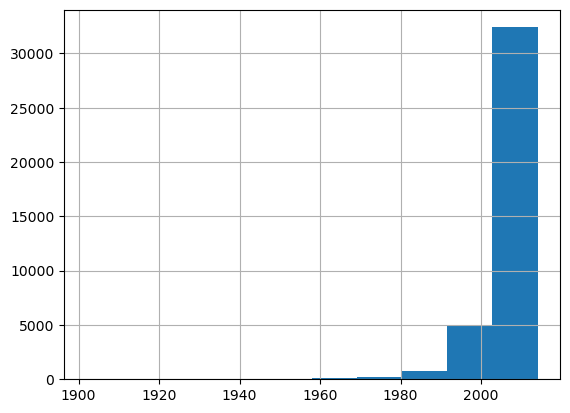

In [29]:
data['founded_year'].hist()  #histogram of year variable

In [30]:
data['founded_year'].max() #newest year

Timestamp('2014-01-01 00:00:00')

In [31]:
data['founded_year'].min() # oldest year

Timestamp('1902-01-01 00:00:00')

In [32]:
data['market'].nunique()  # 753 unique number of market

753

In [33]:
data.groupby('market')['funding_total_usd'].sum().sort_values(ascending = False).head(5) #top 5  markets with the most funding

market
Biotechnology       7.337295e+10
Mobile              4.947011e+10
Software            4.222348e+10
Clean Technology    3.761994e+10
Health Care         2.946608e+10
Name: funding_total_usd, dtype: float64

In [34]:
data.groupby('market')['name'].count().sort_values(ascending = False).head(5)  #Top five markets in terms of count

market
Software         4620
Biotechnology    3688
Mobile           1983
E-Commerce       1805
Curated Web      1655
Name: name, dtype: int64

In [35]:
data.groupby(data['market'])['permalink'].count().sort_values(ascending = False).head(5)  #top 5 markets

market
Software         4620
Biotechnology    3688
Mobile           1983
E-Commerce       1805
Curated Web      1655
Name: permalink, dtype: int64

In [36]:
data['region'].unique()

array(['New York City', 'Los Angeles', 'Tallinn', ..., 'Jodhpur',
       'Muenchen', 'Buckinghamshire'], dtype=object)

In [37]:
data.groupby('region')['name'].count().sort_values(ascending = False).head(10) # top 10 regions. 
# There is a lot from main cities like SF, NYC, Boston, London

region
SF Bay Area         6804
New York City       2577
Boston              1837
London              1588
Los Angeles         1389
Seattle              932
Washington, D.C.     785
Chicago              749
San Diego            700
Denver               636
Name: name, dtype: int64

### Featured Engineering

In [39]:
data['diff_funding'] = data['last_funding_at'] - data['first_funding_at']  # finding the difference in days between first and last funding dates

In [40]:
data["diff_funding"].describe()  # mean is 312 days which is about 1 year 

count                          49428
mean     312 days 11:05:24.253459576
std      624 days 19:13:46.845677584
min                  0 days 00:00:00
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                382 days 00:00:00
max              17287 days 00:00:00
Name: diff_funding, dtype: object

In [41]:
data['diff_funding_months'] = (data['last_funding_at'] - data['first_funding_at'])/np.timedelta64(1, 'm')  # turning the difference into months

In [42]:
data['diff_funding_months'].describe()

count    4.942800e+04
mean     4.499454e+05
std      8.997138e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.500800e+05
max      2.489328e+07
Name: diff_funding_months, dtype: float64

In [43]:
#creating new column for total investment
data['total_investment'] = data['seed'] + data['venture'] + data['equity_crowdfunding'] + data['undisclosed'] + data['convertible_note'] + data['debt_financing'] + data['angel'] + data['grant'] + data['private_equity'] + data['post_ipo_equity'] + data['post_ipo_debt'] + data['secondary_market'] + data['product_crowdfunding']

# calculating the total investment for each company
data['total_investment'].describe() 

count    4.943800e+04
mean     1.316667e+07
std      1.535540e+08
min      0.000000e+00
25%      5.000000e+04
50%      1.000000e+06
75%      6.772162e+06
max      3.007950e+10
Name: total_investment, dtype: float64

In [44]:
data['total_investment'].sum() # sum of total investment

650933703144.0

In [45]:
data['funding_total_usd'].describe()

count    4.943800e+04
mean     1.316667e+07
std      1.535540e+08
min      0.000000e+00
25%      5.000000e+04
50%      1.000000e+06
75%      6.772162e+06
max      3.007950e+10
Name: funding_total_usd, dtype: float64

In [46]:
data['funding_total_usd'].sum()  # confroming that funding total and total investment is the same . We can drop one of the columns.

650933703144.0

In [47]:
# calculating how long it took them to get their first funding after being founded
data['diff_first_funding_months'] = (data['first_funding_at'] - data['founded_at'])/np.timedelta64(1, 'm') 

In [48]:
data['diff_first_funding_months'].describe() 
#negative values shows that there is a founded date but there is no first funding date. 
#Median is around 17 month and mean is around 46 months. 

count    3.854700e+04
mean     2.039591e+06
std      4.877010e+06
min     -2.525184e+07
25%      2.188800e+05
50%      7.862400e+05
75%      2.148480e+06
max      1.206346e+08
Name: diff_first_funding_months, dtype: float64

In [49]:
data1 = data.copy()  #copying dataframe

In [50]:
#dropping unecessary columns that I don't plan on using

data1 = data1.drop(columns= ['homepage_url', 'category_list', 'state_code', 'founded_at', 'founded_month', 'founded_quarter', 'founded_year', 
                    'diff_first_funding_months', 'diff_funding', 'funding_total_usd', 'city', 'region', 'first_funding_at', 'last_funding_at']
                  )


In [51]:
data1 = data1.dropna(subset=['permalink', 'status', 'name', 'market', 'country_code', 'diff_funding_months']
                    ) 

# dropping null values from these columns

In [52]:
data1.isnull().sum()   # checking if there are any null values

permalink               0
name                    0
market                  0
status                  0
country_code            0
funding_rounds          0
seed                    0
venture                 0
equity_crowdfunding     0
undisclosed             0
convertible_note        0
debt_financing          0
angel                   0
grant                   0
private_equity          0
post_ipo_equity         0
post_ipo_debt           0
secondary_market        0
product_crowdfunding    0
round_A                 0
round_B                 0
round_C                 0
round_D                 0
round_E                 0
round_F                 0
round_G                 0
round_H                 0
diff_funding_months     0
total_investment        0
dtype: int64

In [53]:
data1.shape

(40471, 29)

In [54]:
data1['diff_funding_year'] = round(data1['diff_funding_months']/12)  # making new column that has difference in funding in year

In [55]:
data1.groupby(data1['diff_funding_year'])['permalink'].count().sort_values(ascending = False).head(50) 
#number of companies with difference in funding years
#There are not that many companies that has more than 13 year difference in funding

diff_funding_year
0.0        24728
43800.0       93
18360.0       43
29160.0       37
47520.0       36
51240.0       35
11040.0       35
36480.0       35
87720.0       32
87600.0       32
51120.0       31
14640.0       31
21720.0       31
54840.0       30
40200.0       30
43920.0       29
69360.0       29
40080.0       28
32760.0       28
3720.0        28
58560.0       27
18120.0       27
27720.0       26
58440.0       26
54720.0       26
25440.0       25
65520.0       25
29280.0       25
47400.0       25
22080.0       24
32880.0       24
25680.0       23
7320.0        23
76560.0       23
36600.0       23
29400.0       23
60840.0       22
25560.0       22
36360.0       22
47880.0       22
36720.0       22
45360.0       22
29040.0       22
21960.0       21
62160.0       21
72960.0       21
43680.0       21
84000.0       21
76680.0       21
91440.0       20
Name: permalink, dtype: int64

In [56]:
print(data1['market'].nunique())   # number of unique market values
print(data1['country_code'].nunique())   # number of unique country codes

736
113


In [57]:
# grouping markets in industries to decrease the number of segments. The list was being taken from here https://support.crunchbase.com/hc/en-us/articles/360043146954-What-Industries-are-included-in-Crunchbase-

admin_services = str('Employer Benefits Programs, Human Resource Automation, Corporate IT, Distribution, Service Providers, Archiving Service, Call Center, Collection Agency, College Recruiting, Courier Service, Debt Collections, Delivery, Document Preparation, Employee Benefits, Extermination Service, Facilities Support Services, Housekeeping Service, Human Resources, Knowledge Management, Office Administration, Packaging Services, Physical Security, Project Management, Staffing Agency, Trade Shows, Virtual Workforce').split(', ')
advertising = str('Creative Industries, Promotional, Advertising Ad Exchange, Ad Network, Ad Retargeting, Ad Server, Ad Targeting, Advertising, Advertising Platforms, Affiliate Marketing, Local Advertising, Mobile Advertising, Outdoor Advertising, SEM, Social Media Advertising, Video Advertising').split(', ')
agriculture = str('Agriculture, AgTech, Animal Feed, Aquaculture, Equestrian, Farming, Forestry, Horticulture, Hydroponics, Livestock').split(', ')
app = str('Application Performance Monitoring, App Stores, Application Platforms, Enterprise Application, App Discovery, Apps, Consumer Applications, Enterprise Applications, Mobile Apps, Reading Apps, Web Apps').split(', ')
artificial_intelli = str('Artificial Intelligence, Intelligent Systems, Machine Learning, Natural Language Processing, Predictive Analytics').split(', ')
biotechnology = str('Synthetic Biology, Bio-Pharm, Bioinformatics, Biometrics, Biopharma, Biotechnology, Genetics, Life Science, Neuroscience, Quantified Self').split(', ')
clothing = str('Fashion, Laundry and Dry-cleaning, Lingerie, Shoes').split(', ')
shopping = str('Consumer Behavior, Customer Support Tools, Discounts, Reviews and Recommendations, Auctions, Classifieds, Collectibles, Consumer Reviews, Coupons, E-Commerce, E-Commerce Platforms, Flash Sale, Gift, Gift Card, Gift Exchange, Gift Registry, Group Buying, Local Shopping, Made to Order, Marketplace, Online Auctions, Personalization, Point of Sale, Price Comparison, Rental, Retail, Retail Technology, Shopping, Shopping Mall, Social Shopping, Sporting Goods, Vending and Concessions, Virtual Goods, Wholesale').split(', ')
community = str("Self Development, Sex, Forums, Match-Making, Babies, Identity, Women, Kids, Entrepreneur, Networking, Adult, Baby, Cannabis, Children, Communities, Dating, Elderly, Family, Funerals, Humanitarian, Leisure, LGBT, Lifestyle, Men's, Online Forums, Parenting, Pet, Private Social Networking, Professional Networking, Q&A, Religion, Retirement, Sex Industry, Sex Tech, Social, Social Entrepreneurship, Teenagers, Virtual World, Wedding, Women's, Young Adults").split(', ')
electronics  = str('Mac, iPod Touch, Tablets, iPad, iPhone, Computer, Consumer Electronics, Drones, Electronics, Google Glass, Mobile Devices, Nintendo, Playstation, Roku, Smart Home, Wearables, Windows Phone, Xbox').split(', ')
consumer_goods= str('Commodities, Sunglasses, Groceries, Batteries, Cars, Beauty, Comics, Consumer Goods, Cosmetics, DIY, Drones, Eyewear, Fast-Moving Consumer Goods, Flowers, Furniture, Green Consumer Goods, Handmade, Jewelry, Lingerie, Shoes, Tobacco, Toys').split(', ')
content = str('E-Books, MicroBlogging, Opinions, Blogging Platforms, Content Delivery Network, Content Discovery, Content Syndication, Creative Agency, DRM, EBooks, Journalism, News, Photo Editing, Photo Sharing, Photography, Printing, Publishing, Social Bookmarking, Video Editing, Video Streaming').split(', ')
data = str('Optimization, A/B Testing, Analytics, Application Performance Management, Artificial Intelligence, Big Data, Bioinformatics, Biometrics, Business Intelligence, Consumer Research, Data Integration, Data Mining, Data Visualization, Database, Facial Recognition, Geospatial, Image Recognition, Intelligent Systems, Location Based Services, Machine Learning, Market Research, Natural Language Processing, Predictive Analytics, Product Research, Quantified Self, Speech Recognition, Test and Measurement, Text Analytics, Usability Testing').split(', ')
design = str('Visualization, Graphics, Design, Designers, CAD, Consumer Research, Data Visualization, Fashion, Graphic Design, Human Computer Interaction, Industrial Design, Interior Design, Market Research, Mechanical Design, Product Design, Product Research, Usability Testing, UX Design, Web Design').split(', ')
education = str('Universities, College Campuses, University Students, High Schools, All Students, Colleges, Alumni, Charter Schools, College Recruiting, Continuing Education, Corporate Training, E-Learning, EdTech, Education, Edutainment, Higher Education, Language Learning, MOOC, Music Education, Personal Development, Primary Education, Secondary Education, Skill Assessment, STEM Education, Textbook, Training, Tutoring, Vocational Education').split(', ')
energy = str('Gas, Natural Gas Uses, Oil, Oil & Gas, Battery, Biofuel, Biomass Energy, Clean Energy, Electrical Distribution, Energy, Energy Efficiency, Energy Management, Energy Storage, Fossil Fuels, Fuel, Fuel Cell, Oil and Gas, Power Grid, Renewable Energy, Solar, Wind Energy').split(', ')
events = str('Concerts, Event Management, Event Promotion, Events, Nightclubs, Nightlife, Reservations, Ticketing, Wedding').split(', ')
financial = str('Debt Collecting, P2P Money Transfer, Investment Management, Trading, Accounting, Angel Investment, Asset Management, Auto Insurance, Banking, Bitcoin, Commercial Insurance, Commercial Lending, Consumer Lending, Credit, Credit Bureau, Credit Cards, Crowdfunding, Cryptocurrency, Debit Cards, Debt Collections, Finance, Financial Exchanges, Financial Services, FinTech, Fraud Detection, Funding Platform, Gift Card, Health Insurance, Hedge Funds, Impact Investing, Incubators, Insurance, InsurTech, Leasing, Lending, Life Insurance, Micro Lending, Mobile Payments, Payments, Personal Finance, Prediction Markets, Property Insurance, Real Estate Investment, Stock Exchanges, Trading Platform, Transaction Processing, Venture Capital, Virtual Currency, Wealth Management').split(', ')
food = str('Specialty Foods, Bakery, Brewing, Cannabis, Catering, Coffee, Confectionery, Cooking, Craft Beer, Dietary Supplements, Distillery, Farmers Market, Food and Beverage, Food Delivery, Food Processing, Food Trucks, Fruit, Grocery, Nutrition, Organic Food, Recipes, Restaurants, Seafood, Snack Food, Tea, Tobacco, Wine And Spirits, Winery').split(', ')
gaming = str('Game, Games, Casual Games, Console Games, Contests, Fantasy Sports, Gambling, Gamification, Gaming, MMO Games, Online Games, PC Games, Serious Games, Video Games').split(', ')
government = str('Polling, Governance, CivicTech, Government, GovTech, Law Enforcement, Military, National Security, Politics, Public Safety, Social Assistance').split(', ')
hardware= str('Cable, 3D, 3D Technology, Application Specific Integrated Circuit (ASIC), Augmented Reality, Cloud Infrastructure, Communication Hardware, Communications Infrastructure, Computer, Computer Vision, Consumer Electronics, Data Center, Data Center Automation, Data Storage, Drone Management, Drones, DSP, Electronic Design Automation (EDA), Electronics, Embedded Systems, Field-Programmable Gate Array (FPGA), Flash Storage, Google Glass, GPS, GPU, Hardware, Industrial Design, Laser, Lighting, Mechanical Design, Mobile Devices, Network Hardware, NFC, Nintendo, Optical Communication, Playstation, Private Cloud, Retail Technology, RFID, RISC, Robotics, Roku, Satellite Communication, Semiconductor, Sensor, Sex Tech, Telecommunications, Video Conferencing, Virtual Reality, Virtualization, Wearables, Windows Phone, Wireless, Xbox').split(', ')
health_care = str('Senior Health, Physicians, Electronic Health Records, Doctors, Healthcare Services, Diagnostics, Alternative Medicine, Assisted Living, Assistive Technology, Biopharma, Cannabis, Child Care, Clinical Trials, Cosmetic Surgery, Dental, Diabetes, Dietary Supplements, Elder Care, Electronic Health Record (EHR), Emergency Medicine, Employee Benefits, Fertility, First Aid, Funerals, Genetics, Health Care, Health Diagnostics, Home Health Care, Hospital, Medical, Medical Device, mHealth, Nursing and Residential Care, Nutraceutical, Nutrition, Outpatient Care, Personal Health, Pharmaceutical, Psychology, Rehabilitation, Therapeutics, Veterinary, Wellness').split(', ')
it = str('Distributors, Algorithms, ICT, M2M, Technology, Business Information Systems, CivicTech, Cloud Data Services, Cloud Management, Cloud Security, CMS, Contact Management, CRM, Cyber Security, Data Center, Data Center Automation, Data Integration, Data Mining, Data Visualization, Document Management, E-Signature, Email, GovTech, Identity Management, Information and Communications Technology (ICT), Information Services, Information Technology, Intrusion Detection, IT Infrastructure, IT Management, Management Information Systems, Messaging, Military, Network Security, Penetration Testing, Private Cloud, Reputation, Sales Automation, Scheduling, Social CRM, Spam Filtering, Technical Support, Unified Communications, Video Chat, Video Conferencing, Virtualization, VoIP').split(', ')
internet = str('Online Identity, Cyber, Portals, Web Presence Management, Domains, Tracking, Web Tools, Curated Web, Search, Cloud Computing, Cloud Data Services, Cloud Infrastructure, Cloud Management, Cloud Storage, Darknet, Domain Registrar, E-Commerce Platforms, Ediscovery, Email, Internet, Internet of Things, ISP, Location Based Services, Messaging, Music Streaming, Online Forums, Online Portals, Private Cloud, Product Search, Search Engine, SEM, Semantic Search, Semantic Web, SEO, SMS, Social Media, Social Media Management, Social Network, Unified Communications, Vertical Search, Video Chat, Video Conferencing, Visual Search, VoIP, Web Browsers, Web Hosting').split(', ')
invest = str('Angel Investment, Banking, Commercial Lending, Consumer Lending, Credit, Credit Cards, Financial Exchanges, Funding Platform, Hedge Funds, Impact Investing, Incubators, Micro Lending, Stock Exchanges, Trading Platform, Venture Capital').split(', ')
manufacturing = str('Innovation Engineering, Civil Engineers, Heavy Industry, Engineering Firms, Systems, 3D Printing, Advanced Materials, Foundries, Industrial, Industrial Automation, Industrial Engineering, Industrial Manufacturing, Machinery Manufacturing, Manufacturing, Paper Manufacturing, Plastics and Rubber Manufacturing, Textiles, Wood Processing').split(', ')
media = str('Writers, Creative, Television, Entertainment, Media, Advice, Animation, Art, Audio, Audiobooks, Blogging Platforms, Broadcasting, Celebrity, Concerts, Content, Content Creators, Content Discovery, Content Syndication, Creative Agency, Digital Entertainment, Digital Media, DRM, EBooks, Edutainment, Event Management, Event Promotion, Events, Film, Film Distribution, Film Production, Guides, In-Flight Entertainment, Independent Music, Internet Radio, Journalism, Media and Entertainment, Motion Capture, Music, Music Education, Music Label, Music Streaming, Music Venues, Musical Instruments, News, Nightclubs, Nightlife, Performing Arts, Photo Editing, Photo Sharing, Photography, Podcast, Printing, Publishing, Reservations, Social Media, Social News, Theatre, Ticketing, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming, Virtual World').split(', ')
message = str('Unifed Communications, Chat, Email, Meeting Software, Messaging, SMS, Unified Communications, Video Chat, Video Conferencing, VoIP, Wired Telecommunications').split(', ')
mobile = str('Android, Google Glass, iOS, mHealth, Mobile, Mobile Apps, Mobile Devices, Mobile Payments, Windows Phone, Wireless').split(', ')
music = str('Audio, Audiobooks, Independent Music, Internet Radio, Music, Music Education, Music Label, Music Streaming, Musical Instruments, Podcast').split(', ')
resource = str('Biofuel, Biomass Energy, Fossil Fuels, Mineral, Mining, Mining Technology, Natural Resources, Oil and Gas, Precious Metals, Solar, Timber, Water, Wind Energy').split(', ')
navigation = str('Maps, Geospatial, GPS, Indoor Positioning, Location Based Services, Mapping Services, Navigation').split(', ')
other = str('Mass Customization, Monetization, Testing, Subscription Businesses, Mobility, Incentives, Peer-to-Peer, Nonprofits, Alumni, Association, B2B, B2C, Blockchain, Charity, Collaboration, Collaborative Consumption, Commercial, Consumer, Crowdsourcing, Customer Service, Desktop Apps, Emerging Markets, Enterprise, Ethereum, Franchise, Freemium, Generation Y, Generation Z, Homeless Shelter, Infrastructure, Knowledge Management, LGBT Millennials, Non Profit, Peer to Peer, Professional Services, Project Management, Real Time, Retirement, Service Industry, Sharing Economy, Small and Medium Businesses, Social Bookmarking, Social Impact, Subscription Service, Technical Support, Underserved Children, Universities').split(', ')
payment = str('Billing, Bitcoin, Credit Cards, Cryptocurrency, Debit Cards, Fraud Detection, Mobile Payments, Payments, Transaction Processing, Virtual Currency').split(', ')
platforms = str('Development Platforms, Android, Facebook, Google, Google Glass, iOS, Linux, macOS, Nintendo, Operating Systems, Playstation, Roku, Tizen, Twitter, WebOS, Windows, Windows Phone, Xbox').split(', ')
privacy = str('Digital Rights Management, Personal Data, Cloud Security, Corrections Facilities, Cyber Security, DRM, E-Signature, Fraud Detection, Homeland Security, Identity Management, Intrusion Detection, Law Enforcement, Network Security, Penetration Testing, Physical Security, Privacy, Security').split(', ')
services = str('Funeral Industry, English-Speaking, Spas, Plumbers, Service Industries, Staffing Firms, Translation, Career Management, Business Services, Services, Accounting, Business Development, Career Planning, Compliance, Consulting, Customer Service, Employment, Environmental Consulting, Field Support, Freelance, Intellectual Property, Innovation Management, Legal, Legal Tech, Management Consulting, Outsourcing, Professional Networking, Quality Assurance, Recruiting, Risk Management, Social Recruiting, Translation Service').split(', ')
realestate= str('Office Space, Self Storage, Brokers, Storage, Home Owners, Self Storage , Realtors, Home & Garden, Utilities, Home Automation, Architecture, Building Maintenance, Building Material, Commercial Real Estate, Construction, Coworking, Facility Management, Fast-Moving Consumer Goods, Green Building, Home and Garden, Home Decor, Home Improvement, Home Renovation, Home Services, Interior Design, Janitorial Service, Landscaping, Property Development, Property Management, Real Estate, Real Estate Investment, Rental Property, Residential, Self-Storage, Smart Building, Smart Cities, Smart Home, Timeshare, Vacation Rental').split(', ')
sales = str('Advertising, Affiliate Marketing, App Discovery, App Marketing, Brand Marketing, Cause Marketing, Content Marketing, CRM, Digital Marketing, Digital Signage, Direct Marketing, Direct Sales, Email Marketing, Lead Generation, Lead Management, Local, Local Advertising, Local Business, Loyalty Programs, Marketing, Marketing Automation, Mobile Advertising, Multi-level Marketing, Outdoor Advertising, Personal Branding, Public Relations, Sales, Sales Automation, SEM, SEO, Social CRM, Social Media Advertising, Social Media Management, Social Media Marketing, Sponsorship, Video Advertising').split(', ')
science = str('Face Recognition, New Technologies, Advanced Materials, Aerospace, Artificial Intelligence, Bioinformatics, Biometrics, Biopharma, Biotechnology, Chemical, Chemical Engineering, Civil Engineering, Embedded Systems, Environmental Engineering, Human Computer Interaction, Industrial Automation, Industrial Engineering, Intelligent Systems, Laser, Life Science, Marine Technology, Mechanical Engineering, Nanotechnology, Neuroscience, Nuclear, Quantum Computing, Robotics, Semiconductor, Software Engineering, STEM Education').split(', ')
software = str('Business Productivity, 3D Technology, Android, App Discovery, Application Performance Management, Apps, Artificial Intelligence, Augmented Reality, Billing, Bitcoin, Browser Extensions, CAD, Cloud Computing, Cloud Management, CMS, Computer Vision, Consumer Applications, Consumer Software, Contact Management, CRM, Cryptocurrency, Data Center Automation, Data Integration, Data Storage, Data Visualization, Database, Developer APIs, Developer Platform, Developer Tools, Document Management, Drone Management, E-Learning, EdTech, Electronic Design Automation (EDA), Embedded Software, Embedded Systems, Enterprise Applications, Enterprise Resource Planning (ERP), Enterprise Software, Facial Recognition, File Sharing, IaaS, Image Recognition, iOS, Linux, Machine Learning, macOS, Marketing Automation, Meeting Software, Mobile Apps, Mobile Payments, MOOC, Natural Language Processing, Open Source, Operating Systems, PaaS, Predictive Analytics, Presentation Software, Presentations, Private Cloud, Productivity Tools, QR Codes, Reading Apps, Retail Technology, Robotics, SaaS, Sales Automation, Scheduling, Sex Tech, Simulation, SNS, Social CRM, Software, Software Engineering, Speech Recognition, Task Management, Text Analytics, Transaction Processing, Video Conferencing, Virtual Assistant, Virtual Currency, Virtual Desktop, Virtual Goods, Virtual Reality, Virtual World, Virtualization, Web Apps, Web Browsers, Web Development').split(', ')
sports = str('American Football, Baseball, Basketball, Boating, Cricket, Cycling, Diving, eSports, Fantasy Sports, Fitness, Golf, Hockey, Hunting, Outdoors, Racing, Recreation, Rugby, Sailing, Skiing, Soccer, Sporting Goods, Sports, Surfing, Swimming, Table Tennis, Tennis, Ultimate Frisbee, Volley Ball').split(', ')
sustainability = str('Green, Wind, Biomass Power Generation, Renewable Tech, Environmental Innovation, Renewable Energies, Clean Technology, Biofuel, Biomass Energy, Clean Energy, CleanTech, Energy Efficiency, Environmental Engineering, Green Building, Green Consumer Goods, GreenTech, Natural Resources, Organic, Pollution Control, Recycling, Renewable Energy, Solar, Sustainability, Waste Management, Water Purification, Wind Energy').split(', ')
transportation = str('Taxis, Air Transportation, Automotive, Autonomous Vehicles, Car Sharing, Courier Service, Delivery Service, Electric Vehicle, Ferry Service, Fleet Management, Food Delivery, Freight Service, Last Mile Transportation, Limousine Service, Logistics, Marine Transportation, Parking, Ports and Harbors, Procurement, Public Transportation, Railroad, Recreational Vehicles, Ride Sharing, Same Day Delivery, Shipping, Shipping Broker, Space Travel, Supply Chain Management, Taxi Service, Transportation, Warehousing, Water Transportation').split(', ')
travel = str('Adventure Travel, Amusement Park and Arcade, Business Travel, Casino, Hospitality, Hotel, Museums and Historical Sites, Parks, Resorts, Timeshare, Tour Operator, Tourism, Travel, Travel Accommodations, Travel Agency, Vacation Rental').split(', ')
video = str('Animation, Broadcasting, Film, Film Distribution, Film Production, Motion Capture, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming').split(', ')


In [58]:
# #Making new column called  Industry group
# data1['Industry_Group'] = np.where(data1.market.str.contains('|'.join(admin_services), flags=re.IGNORECASE), "Administrative Services",
#                                np.where(data1.market.str.contains('|'.join(software), flags=re.IGNORECASE), "Software", 
#                                np.where(data1.market.str.contains('|'.join(advertising), flags=re.IGNORECASE), "Advertising",
#                                np.where(data1.market.str.contains('|'.join(agriculture), flags=re.IGNORECASE), "Agriculture and Farming",
#                                np.where(data1.market.str.contains('|'.join(app), flags=re.IGNORECASE), "Apps", 
#                                np.where(data1.market.str.contains('|'.join(artificial_intelli), flags=re.IGNORECASE), "Artificial Intelligence", 
#                                np.where(data1.market.str.contains('|'.join(biotechnology), flags=re.IGNORECASE), "Biotechnology", 
#                                np.where(data1.market.str.contains('|'.join(clothing), flags=re.IGNORECASE), "Clothing and Apparel", 
#                                np.where(data1.market.str.contains('|'.join(shopping), flags=re.IGNORECASE), "Commerce and Shopping", 
#                                np.where(data1.market.str.contains('|'.join(community), flags=re.IGNORECASE), "Community and Lifestyle", 
#                                np.where(data1.market.str.contains('|'.join(electronics), flags=re.IGNORECASE), "Consumer Electronics", 
#                                np.where(data1.market.str.contains('|'.join(consumer_goods), flags=re.IGNORECASE), "Consumer Goods", 
#                                np.where(data1.market.str.contains('|'.join(content), flags=re.IGNORECASE), "Content and Publishing", 
#                                np.where(data1.market.str.contains('|'.join(data), flags=re.IGNORECASE), "Data and Analytics",
#                                np.where(data1.market.str.contains('|'.join(design), flags=re.IGNORECASE), "Design", 
#                                np.where(data1.market.str.contains('|'.join(education), flags=re.IGNORECASE), "Education", 
#                                np.where(data1.market.str.contains('|'.join(energy), flags=re.IGNORECASE), "Energy", 
#                                np.where(data1.market.str.contains('|'.join(events), flags=re.IGNORECASE), "Events", 
#                                np.where(data1.market.str.contains('|'.join(financial), flags=re.IGNORECASE), "Financial Services",
#                                np.where(data1.market.str.contains('|'.join(food), flags=re.IGNORECASE), "Food and Beverage", 
#                                np.where(data1.market.str.contains('|'.join(gaming), flags=re.IGNORECASE), "Gaming", 
#                                np.where(data1.market.str.contains('|'.join(government), flags=re.IGNORECASE), "Government and Military", 
#                                np.where(data1.market.str.contains('|'.join(hardware), flags=re.IGNORECASE), "Hardware",
#                                np.where(data1.market.str.contains('|'.join(health_care), flags=re.IGNORECASE), "Health Care",
#                                np.where(data1.market.str.contains('|'.join(it), flags=re.IGNORECASE), "Information Technology", 
#                                np.where(data1.market.str.contains('|'.join(internet), flags=re.IGNORECASE), "Internet Services", 
#                                np.where(data1.market.str.contains('|'.join(invest), flags=re.IGNORECASE), "Lending and Investments", 
#                                np.where(data1.market.str.contains('|'.join(manufacturing), flags=re.IGNORECASE), "Manufacturing",
#                                np.where(data1.market.str.contains('|'.join(media), flags=re.IGNORECASE), "Media and Entertainment",
#                                np.where(data1.market.str.contains('|'.join(message), flags=re.IGNORECASE), "Messaging and Telecommunication", 
#                                np.where(data1.market.str.contains('|'.join(mobile), flags=re.IGNORECASE), "Mobile", 
#                                np.where(data1.market.str.contains('|'.join(music), flags=re.IGNORECASE), "Music and Audio", 
#                                np.where(data1.market.str.contains('|'.join(resource), flags=re.IGNORECASE), "Natural Resources",
#                                np.where(data1.market.str.contains('|'.join(navigation), flags=re.IGNORECASE), "Navigation and Mapping",
#                                np.where(data1.market.str.contains('|'.join(payment), flags=re.IGNORECASE), "Payments", 
#                                np.where(data1.market.str.contains('|'.join(platforms), flags=re.IGNORECASE), "Platforms", 
#                                np.where(data1.market.str.contains('|'.join(privacy), flags=re.IGNORECASE), "Privacy and Security", 
#                                np.where(data1.market.str.contains('|'.join(services), flags=re.IGNORECASE), "Professional Services",
#                                np.where(data1.market.str.contains('|'.join(realestate), flags=re.IGNORECASE), "Real Estate", 
#                                np.where(data1.market.str.contains('|'.join(sales), flags=re.IGNORECASE), "Sales and Marketing", 
#                                np.where(data1.market.str.contains('|'.join(science), flags=re.IGNORECASE), "Science and Engineering", 
#                                np.where(data1.market.str.contains('|'.join(sports), flags=re.IGNORECASE), "Sports",
#                                np.where(data1.market.str.contains('|'.join(sustainability), flags=re.IGNORECASE), "Sustainability", 
#                                np.where(data1.market.str.contains('|'.join(transportation), flags=re.IGNORECASE), "Transportation", 
#                                np.where(data1.market.str.contains('|'.join(travel), flags=re.IGNORECASE), "Travel and Tourism", 
#                                np.where(data1.market.str.contains('|'.join(video), flags=re.IGNORECASE), "Video",
#                                np.where(data1.market.str.contains('|'.join(other), flags=re.IGNORECASE), "Other",  "Other")))))))))))))))))))))))))))))))))))))))))))))))

In [59]:
# Define a mapping of keywords to industry groups
industry_mapping = {
    "Administrative Services": admin_services,
    "Software": software,
    "Advertising": advertising,
    "Agriculture and Farming": agriculture,
    "Apps": app,
    "Artificial Intelligence": artificial_intelli,
    "Biotechnology": biotechnology,
    "Clothing and Apparel": clothing,
    "Commerce and Shopping": shopping,
    "Community and Lifestyle": community,
    "Consumer Electronics": electronics,
    "Consumer Goods": consumer_goods,
    "Content and Publishing": content,
    "Data and Analytics": data,
    "Design": design,
    "Education": education,
    "Energy": energy,
    "Events": events,
    "Financial Services": financial,
    "Food and Beverage": food,
    "Gaming": gaming,
    "Government and Military": government,
    "Hardware": hardware,
    "Health Care": health_care,
    "Information Technology": it,
    "Internet Services": internet,
    "Lending and Investments": invest,
    "Manufacturing": manufacturing,
    "Media and Entertainment": media,
    "Messaging and Telecommunication": message,
    "Mobile": mobile,
    "Music and Audio": music,
    "Natural Resources": resource,
    "Navigation and Mapping": navigation,
    "Payments": payment,
    "Platforms": platforms,
    "Privacy and Security": privacy,
    "Professional Services": services,
    "Real Estate": realestate,
    "Sales and Marketing": sales,
    "Science and Engineering": science,
    "Sports": sports,
    "Sustainability": sustainability,
    "Transportation": transportation,
    "Travel and Tourism": travel,
    "Video": video,
    "Other": other,
}

# Function to map 'market' column values to industry groups
def get_industry_group(market_value):
    for industry, keywords in industry_mapping.items():
        if any(keyword.lower() in market_value.lower() for keyword in keywords):
            return industry
    return "Other"

# Apply the function to create a new column
data1['Industry_Group'] = data1['market'].apply(get_industry_group)


In [60]:
data1["Industry_Group"]

0        Content and Publishing
1                        Gaming
2        Content and Publishing
3          Consumer Electronics
4            Travel and Tourism
                  ...          
49432             Biotechnology
49433                 Education
49434                  Software
49435                  Software
49437                  Software
Name: Industry_Group, Length: 40471, dtype: object

In [61]:
data1["Industry_Group"].unique()

array(['Content and Publishing', 'Gaming', 'Consumer Electronics',
       'Travel and Tourism', 'Advertising', 'Software',
       'Commerce and Shopping', 'Health Care', 'Real Estate', 'Education',
       'Internet Services', 'Food and Beverage',
       'Media and Entertainment', 'Data and Analytics',
       'Clothing and Apparel', 'Other', 'Biotechnology',
       'Community and Lifestyle', 'Sports', 'Mobile', 'Manufacturing',
       'Design', 'Financial Services', 'Messaging and Telecommunication',
       'Information Technology', 'Professional Services',
       'Administrative Services', 'Navigation and Mapping',
       'Transportation', 'Hardware', 'Privacy and Security',
       'Sales and Marketing', 'Natural Resources', 'Consumer Goods',
       'Events', 'Energy', 'Platforms', 'Apps', 'Science and Engineering',
       'Government and Military', 'Agriculture and Farming',
       'Sustainability', 'Artificial Intelligence'], dtype=object)

In [62]:
data1["Industry_Group"].nunique()

43

In [63]:
data1.groupby(by = ['Industry_Group'])['permalink'].count().sort_values(ascending = False)  #number of companies in each industry group


Industry_Group
Software                           8069
Biotechnology                      3494
Health Care                        2975
Internet Services                  2646
Commerce and Shopping              2267
Information Technology             1983
Mobile                             1800
Community and Lifestyle            1610
Advertising                        1548
Financial Services                 1265
Media and Entertainment            1234
Gaming                             1184
Professional Services               970
Education                           927
Data and Analytics                  911
Content and Publishing              815
Other                               796
Manufacturing                       690
Real Estate                         561
Privacy and Security                536
Sales and Marketing                 529
Transportation                      485
Travel and Tourism                  406
Clothing and Apparel                357
Consumer Electronics     

**Software companies is most.**

<Axes: >

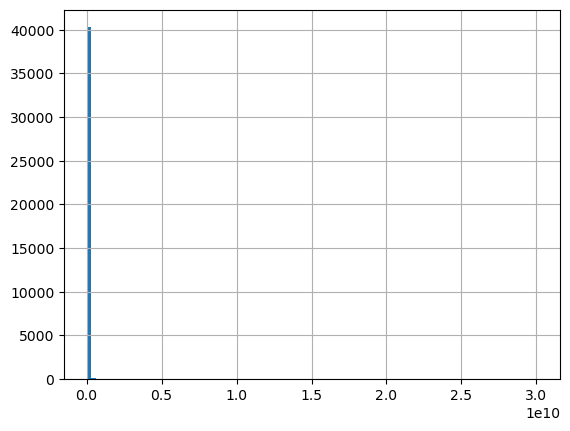

In [65]:
data1['total_investment'].hist(bins = 100)  # histogram of total investment

In [66]:
country = pd.read_csv("data_folders/country.csv")
country = country[['Continent_Name', 'Three_Letter_Country_Code', 'Country_Name']]
country = country.dropna(how="any", axis =0)
country.isnull().sum()        #checking the null values

Continent_Name               0
Three_Letter_Country_Code    0
Country_Name                 0
dtype: int64

In [67]:
data1 = data1.merge(country, left_on='country_code', right_on='Three_Letter_Country_Code')

# merging both datasets and creating new column called continent
data1.columns

Index(['permalink', 'name', 'market', 'status', 'country_code',
       'funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'diff_funding_months', 'total_investment', 'diff_funding_year',
       'Industry_Group', 'Continent_Name', 'Three_Letter_Country_Code',
       'Country_Name'],
      dtype='object')

In [68]:
data1.groupby(by = ['Continent_Name'])['permalink'].count().sort_values(ascending = False)  #number of companies in each continent


Continent_Name
North America    27908
Europe            6988
Asia              4076
South America      648
Oceania            334
Africa             168
Others              10
Name: permalink, dtype: int64

**North America is the highest.**

In [70]:
data1.shape

(40132, 34)

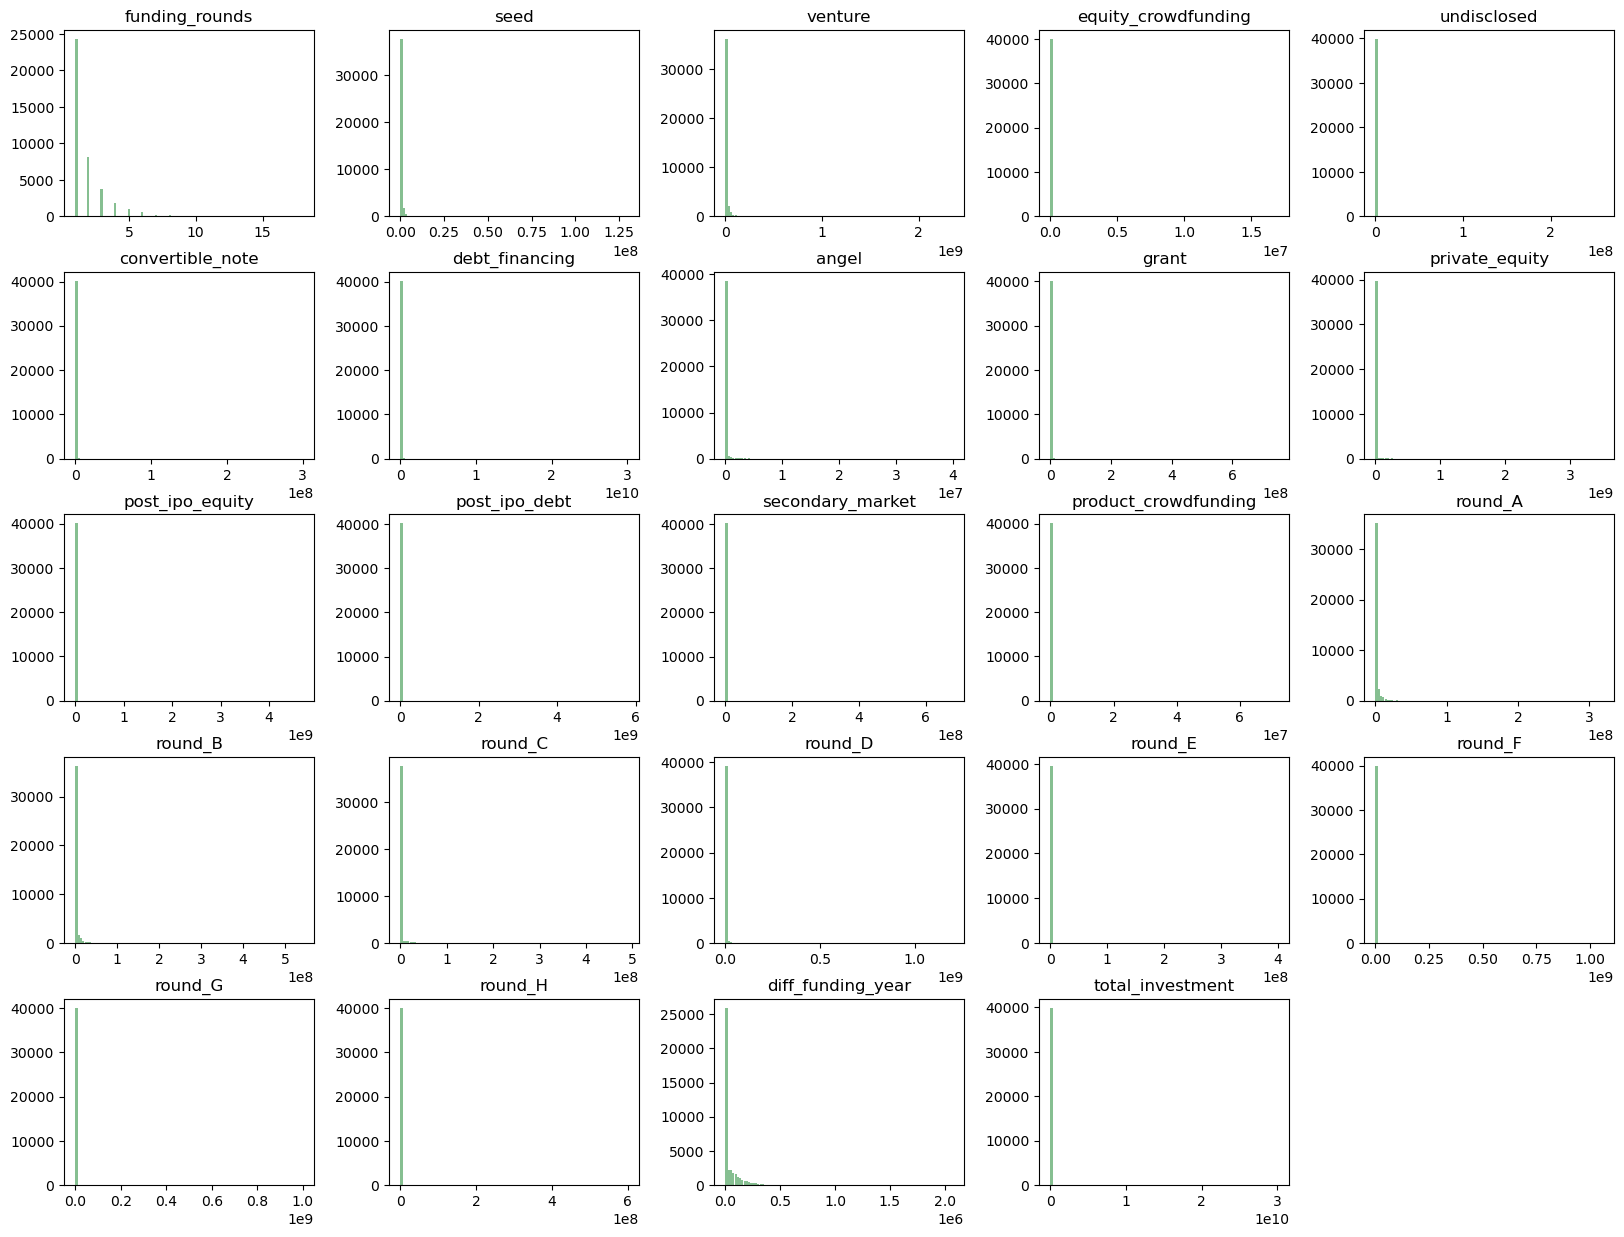

In [71]:
data1.hist(column=['funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'diff_funding_year', 'total_investment'], bins=100, grid=False, figsize=(20,15), color='#86bf91', zorder=2, rwidth=0.9) 
plt.show()
# creating histogram of all numberical values, all values are very skewed

In [72]:
data1.isin([0]).sum() # total number of zeros in each column

permalink                        0
name                             0
market                           0
status                           0
country_code                     0
funding_rounds                   0
seed                         29208
venture                      19496
equity_crowdfunding          39682
undisclosed                  39415
convertible_note             39640
debt_financing               36321
angel                        37484
grant                        39229
private_equity               38931
post_ipo_equity              39897
post_ipo_debt                40073
secondary_market             40116
product_crowdfunding         39960
round_A                      31991
round_B                      35040
round_C                      37433
round_D                      38890
round_E                      39634
round_F                      39965
round_G                      40100
round_H                      40128
diff_funding_months          24464
total_investment    

In [73]:
data2 =data1.copy()

In [74]:
data2 = data2.drop(['Three_Letter_Country_Code', 'Country_Name', 'diff_funding_months', 'country_code', 'market'], axis=1) # dropping unnecessary columns

In [75]:
data2[['funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'diff_funding_year', 'total_investment']].describe().T

,count,mean,std,min,25%,50%,75%,max
funding_rounds,40132.0,1.796322e+00,1.373027e+00,1.0,1.0,1.0,2.0,1.800000e+01
seed,40132.0,2.360671e+05,1.142935e+06,0.0,0.0,0.0,25000.0,1.300000e+08
venture,40132.0,8.611128e+06,3.076310e+07,0.0,0.0,101762.0,6015040.0,2.351000e+09
equity_crowdfunding,40132.0,5.942135e+03,1.712929e+05,0.0,0.0,0.0,0.0,1.700000e+07
undisclosed,40132.0,1.143660e+05,2.598575e+06,0.0,0.0,0.0,0.0,2.594178e+08
convertible_note,40132.0,2.744601e+04,1.588229e+06,0.0,0.0,0.0,0.0,3.000000e+08
debt_financing,40132.0,2.107945e+06,1.524835e+08,0.0,0.0,0.0,0.0,3.007950e+10
angel,40132.0,6.865384e+04,5.790221e+05,0.0,0.0,0.0,0.0,4.000000e+07
grant,40132.0,1.794344e+05,6.127868e+06,0.0,0.0,0.0,0.0,7.505000e+08
private_equity,40132.0,2.297263e+06,3.413836e+07,0.0,0.0,0.0,0.0,3.500000e+09


In [76]:
#creating categories of these numerical values based on the output from the describe data. Also creating new column for the categories
cat_invest = pd.cut(data2.total_investment, bins = [-1, 112500, 1400300, 8205200, 40079503000], labels=['low','low_medium','high_medium','high'])

#labeling total investment values as low, low medium, high medium and high based on their descriptive summary. 
data2.insert(0,'cat_total_investment',cat_invest)   
        # creating one new columns as cat_total_investment

In [77]:
cat_diff_funding_year = pd.cut(data2.diff_funding_year, bins = [-1, 2, 49], labels=['low','high'])

#labeling diff_funding_year as low and high based on their descriptive summary. 
data2.insert(0,'cat_diff_funding_year',cat_diff_funding_year)
        # creating new column called cat_diff_funding_year

In [78]:
cat_funding_rounds = pd.cut(data2.funding_rounds, bins = [-1, 2, 20], labels=['low','high'])

#labeling funding_rounds as low and high based on their descriptive summary. 
data2.insert(0,'cat_funding_rounds',cat_funding_rounds)
        # creating new column called cat_funding_rounds

In [79]:
cat_seed = pd.cut(data2.seed, bins = [-1, 28000, 140000000], labels=['low','high'])

#labeling seed as low and high  based on their descriptive summary. 
data2.insert(0,'cat_seed',cat_seed)
        # creating new column called cat_seed

In [80]:
cat_venture = pd.cut(data2.venture, bins = [-1, 85038.5, 6000000, 2451000000], labels=['low','medium','high'])

#labeling venture as low, medium and high based on their descriptive summary. 
data2.insert(0,'cat_venture',cat_venture) 
        # creating new column called cat_venture

In [81]:
data2.head(3)

,cat_venture,cat_seed,cat_funding_rounds,cat_diff_funding_year,cat_total_investment,permalink,name,status,funding_rounds,seed,...,round_C,round_D,round_E,round_F,round_G,round_H,total_investment,diff_funding_year,Industry_Group,Continent_Name
0,low,high,low,low,high_medium,/organization/waywire,#waywire,acquired,1.0,1750000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1750000.0,0.0,Content and Publishing,North America
1,medium,low,low,NaN,high_medium,/organization/tv-communications,&TV Communications,operating,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4000000.0,13320.0,Gaming,North America
2,low,high,low,low,low,/organization/rock-your-paper,'Rock' Your Paper,operating,1.0,40000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,0.0,Content and Publishing,Europe


In [82]:
# fixing the categorical columns  into numerical values so that we can use it on the model
data2['cat_status'] = data2['status'].replace(['closed', 'operating', 'acquired'], [0, 1, 2])
data2['cat_total_investment'] = data2['cat_total_investment'].replace(['low','low_medium','high_medium','high'], [0, 1, 2, 3])
data2['cat_diff_funding_year'] = data2['cat_diff_funding_year'].replace(['low', 'high'], [0, 1])
data2['cat_funding_rounds'] = data2['cat_funding_rounds'].replace(['low', 'high'], [0, 1])
data2['cat_seed'] = data2['cat_seed'].replace(['low', 'high'], [0, 1])
data2['cat_venture'] = data2['cat_venture'].replace(['low','medium','high'], [0, 1, 3])

C:\Users\Mrityunjay\AppData\Local\Temp\ipykernel_5808\215101020.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data2['cat_status'] = data2['status'].replace(['closed', 'operating', 'acquired'], [0, 1, 2])
C:\Users\Mrityunjay\AppData\Local\Temp\ipykernel_5808\215101020.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data2['cat_total_investment'] = data2['cat_total_investment'].replace(['low','low_medium','high_medium','high'], [0, 1, 2, 3])
C:\Users\Mrityunjay\AppData\Local\Temp\ipykernel_5808\215101020.py:3: FutureWarning

In [83]:
data2.head(2)

,cat_venture,cat_seed,cat_funding_rounds,cat_diff_funding_year,cat_total_investment,permalink,name,status,funding_rounds,seed,...,round_D,round_E,round_F,round_G,round_H,total_investment,diff_funding_year,Industry_Group,Continent_Name,cat_status
0,0,1,0,0,2,/organization/waywire,#waywire,acquired,1.0,1750000.0,...,0.0,0.0,0.0,0.0,0.0,1750000.0,0.0,Content and Publishing,North America,2
1,1,0,0,NaN,2,/organization/tv-communications,&TV Communications,operating,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4000000.0,13320.0,Gaming,North America,1


In [84]:
data2.columns

Index(['cat_venture', 'cat_seed', 'cat_funding_rounds',
       'cat_diff_funding_year', 'cat_total_investment', 'permalink', 'name',
       'status', 'funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'total_investment', 'diff_funding_year', 'Industry_Group',
       'Continent_Name', 'cat_status'],
      dtype='object')

In [85]:
#as a lot of the money columns have 0, we are turning them into new categories of 0 and 1

data2.loc[data2['equity_crowdfunding'] < 1, 'cat_equity_crowdfunding'] = 0
data2.loc[data2['equity_crowdfunding'] > 1, 'cat_equity_crowdfunding'] = 1


data2.loc[data2['undisclosed'] < 1, 'cat_undisclosed'] = 0
data2.loc[data2['undisclosed'] > 1, 'cat_undisclosed'] = 1


data2.loc[data2['convertible_note'] < 1, 'cat_convertible_note'] = 0
data2.loc[data2['convertible_note'] > 1, 'cat_convertible_note'] = 1

data2.loc[data2['debt_financing'] < 1, 'cat_debt_financing'] = 0
data2.loc[data2['debt_financing'] > 1, 'cat_debt_financing'] = 1

data2.loc[data2['angel'] < 1, 'cat_angel'] = 0
data2.loc[data2['angel'] > 1, 'cat_angel'] = 1

data2.loc[data2['grant'] < 1, 'cat_grant'] = 0
data2.loc[data2['grant'] > 1, 'cat_grant'] = 1


data2.loc[data2['private_equity'] < 1, 'cat_private_equity'] = 0
data2.loc[data2['private_equity'] > 1, 'cat_private_equity'] = 1

data2.loc[data2['post_ipo_equity'] < 1, 'cat_post_ipo_equity'] = 0
data2.loc[data2['post_ipo_equity'] > 1, 'cat_post_ipo_equity'] = 1

data2.loc[data2['post_ipo_debt'] < 1, 'cat_post_ipo_debt'] = 0
data2.loc[data2['post_ipo_debt'] > 1, 'cat_post_ipo_debt'] = 1

data2.loc[data2['secondary_market'] < 1, 'cat_secondary_market'] = 0
data2.loc[data2['secondary_market'] > 1, 'cat_secondary_market'] = 1

data2.loc[data2['product_crowdfunding'] < 1, 'cat_product_crowdfunding'] = 0
data2.loc[data2['product_crowdfunding'] > 1, 'cat_product_crowdfunding'] = 1

data2.loc[data2['round_A'] < 1, 'cat_round_A'] = 0
data2.loc[data2['round_A'] > 1, 'cat_round_A'] = 1

data2.loc[data2['round_B'] < 1, 'cat_round_B'] = 0
data2.loc[data2['round_B'] > 1, 'cat_round_B'] = 1

data2.loc[data2['round_C'] < 1, 'cat_round_C'] = 0
data2.loc[data2['round_C'] > 1, 'cat_round_C'] = 1

data2.loc[data2['round_D'] < 1, 'cat_round_D'] = 0
data2.loc[data2['round_D'] > 1, 'cat_round_D'] = 1

data2.loc[data2['round_E'] < 1, 'cat_round_E'] = 0
data2.loc[data2['round_E'] > 1, 'cat_round_E'] = 1

data2.loc[data2['round_F'] < 1, 'cat_round_F'] = 0
data2.loc[data2['round_F'] > 1, 'cat_round_F'] = 1

data2.loc[data2['round_G'] < 1, 'cat_round_G'] = 0
data2.loc[data2['round_G'] > 1, 'cat_round_G'] = 1

data2.loc[data2['round_H'] < 1, 'cat_round_H'] = 0
data2.loc[data2['round_H'] > 1, 'cat_round_H'] = 1


In [86]:
data2.head().T

,0,1,2,3,4
cat_venture,0,1,0,0,0
cat_seed,1,0,1,1,0
cat_funding_rounds,0,0,0,0,0
cat_diff_funding_year,0,NaN,0,0,NaN
cat_total_investment,2,2,0,2,0
permalink,/organization/waywire,/organization/tv-communications,/organization/rock-your-paper,/organization/in-touch-network,/organization/r-ranch-and-mine
name,#waywire,&TV Communications,'Rock' Your Paper,(In)Touch Network,-R- Ranch and Mine
status,acquired,operating,operating,operating,operating
funding_rounds,1.0,2.0,1.0,1.0,2.0
seed,1750000.0,0.0,40000.0,1500000.0,0.0


In [87]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

#using label encoder for these two columns as there is a lot of variables
data2['cat_Continent_Name'] = labelencoder.fit_transform(data2['Continent_Name']) 
data2['cat_Industry_Group'] = labelencoder.fit_transform(data2['Industry_Group'])

In [88]:
# Selecting the columns we need for the model
data3 = data2[['cat_status', 'cat_Industry_Group',
       'cat_Continent_Name','cat_funding_rounds',
       'cat_diff_funding_year', 'cat_total_investment' , 
       'cat_equity_crowdfunding', 'cat_venture', 'cat_seed', 'cat_undisclosed',
       'cat_convertible_note', 'cat_debt_financing', 'cat_angel', 'cat_grant',
       'cat_private_equity', 'cat_post_ipo_equity', 'cat_post_ipo_debt',
       'cat_secondary_market', 'cat_product_crowdfunding', 'cat_round_A',
       'cat_round_B', 'cat_round_C', 'cat_round_D', 'cat_round_E',
       'cat_round_F', 'cat_round_G', 'cat_round_H']] 

data3.head()

,cat_status,cat_Industry_Group,cat_Continent_Name,cat_funding_rounds,cat_diff_funding_year,cat_total_investment,cat_equity_crowdfunding,cat_venture,cat_seed,cat_undisclosed,...,cat_secondary_market,cat_product_crowdfunding,cat_round_A,cat_round_B,cat_round_C,cat_round_D,cat_round_E,cat_round_F,cat_round_G,cat_round_H
0,2,11,3,0,0,2,0.0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,19,3,0,NaN,2,0.0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,11,2,0,0,0,0.0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,9,2,0,0,2,0.0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,42,3,0,NaN,0,1.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
data3.dtypes    #types of columns

cat_status                     int64
cat_Industry_Group             int32
cat_Continent_Name             int32
cat_funding_rounds          category
cat_diff_funding_year       category
cat_total_investment        category
cat_equity_crowdfunding      float64
cat_venture                 category
cat_seed                    category
cat_undisclosed              float64
cat_convertible_note         float64
cat_debt_financing           float64
cat_angel                    float64
cat_grant                    float64
cat_private_equity           float64
cat_post_ipo_equity          float64
cat_post_ipo_debt            float64
cat_secondary_market         float64
cat_product_crowdfunding     float64
cat_round_A                  float64
cat_round_B                  float64
cat_round_C                  float64
cat_round_D                  float64
cat_round_E                  float64
cat_round_F                  float64
cat_round_G                  float64
cat_round_H                  float64
d

In [90]:
data3.isna().sum()   #checking null values

cat_status                      0
cat_Industry_Group              0
cat_Continent_Name              0
cat_funding_rounds              0
cat_diff_funding_year       15668
cat_total_investment            0
cat_equity_crowdfunding         0
cat_venture                     0
cat_seed                        0
cat_undisclosed                 0
cat_convertible_note            0
cat_debt_financing              0
cat_angel                       0
cat_grant                       0
cat_private_equity              0
cat_post_ipo_equity             0
cat_post_ipo_debt               0
cat_secondary_market            0
cat_product_crowdfunding        0
cat_round_A                     0
cat_round_B                     0
cat_round_C                     0
cat_round_D                     0
cat_round_E                     0
cat_round_F                     0
cat_round_G                     0
cat_round_H                     0
dtype: int64

## Statistics and Variable Selection

<Axes: title={'center': 'Pearson Correlation of features'}>

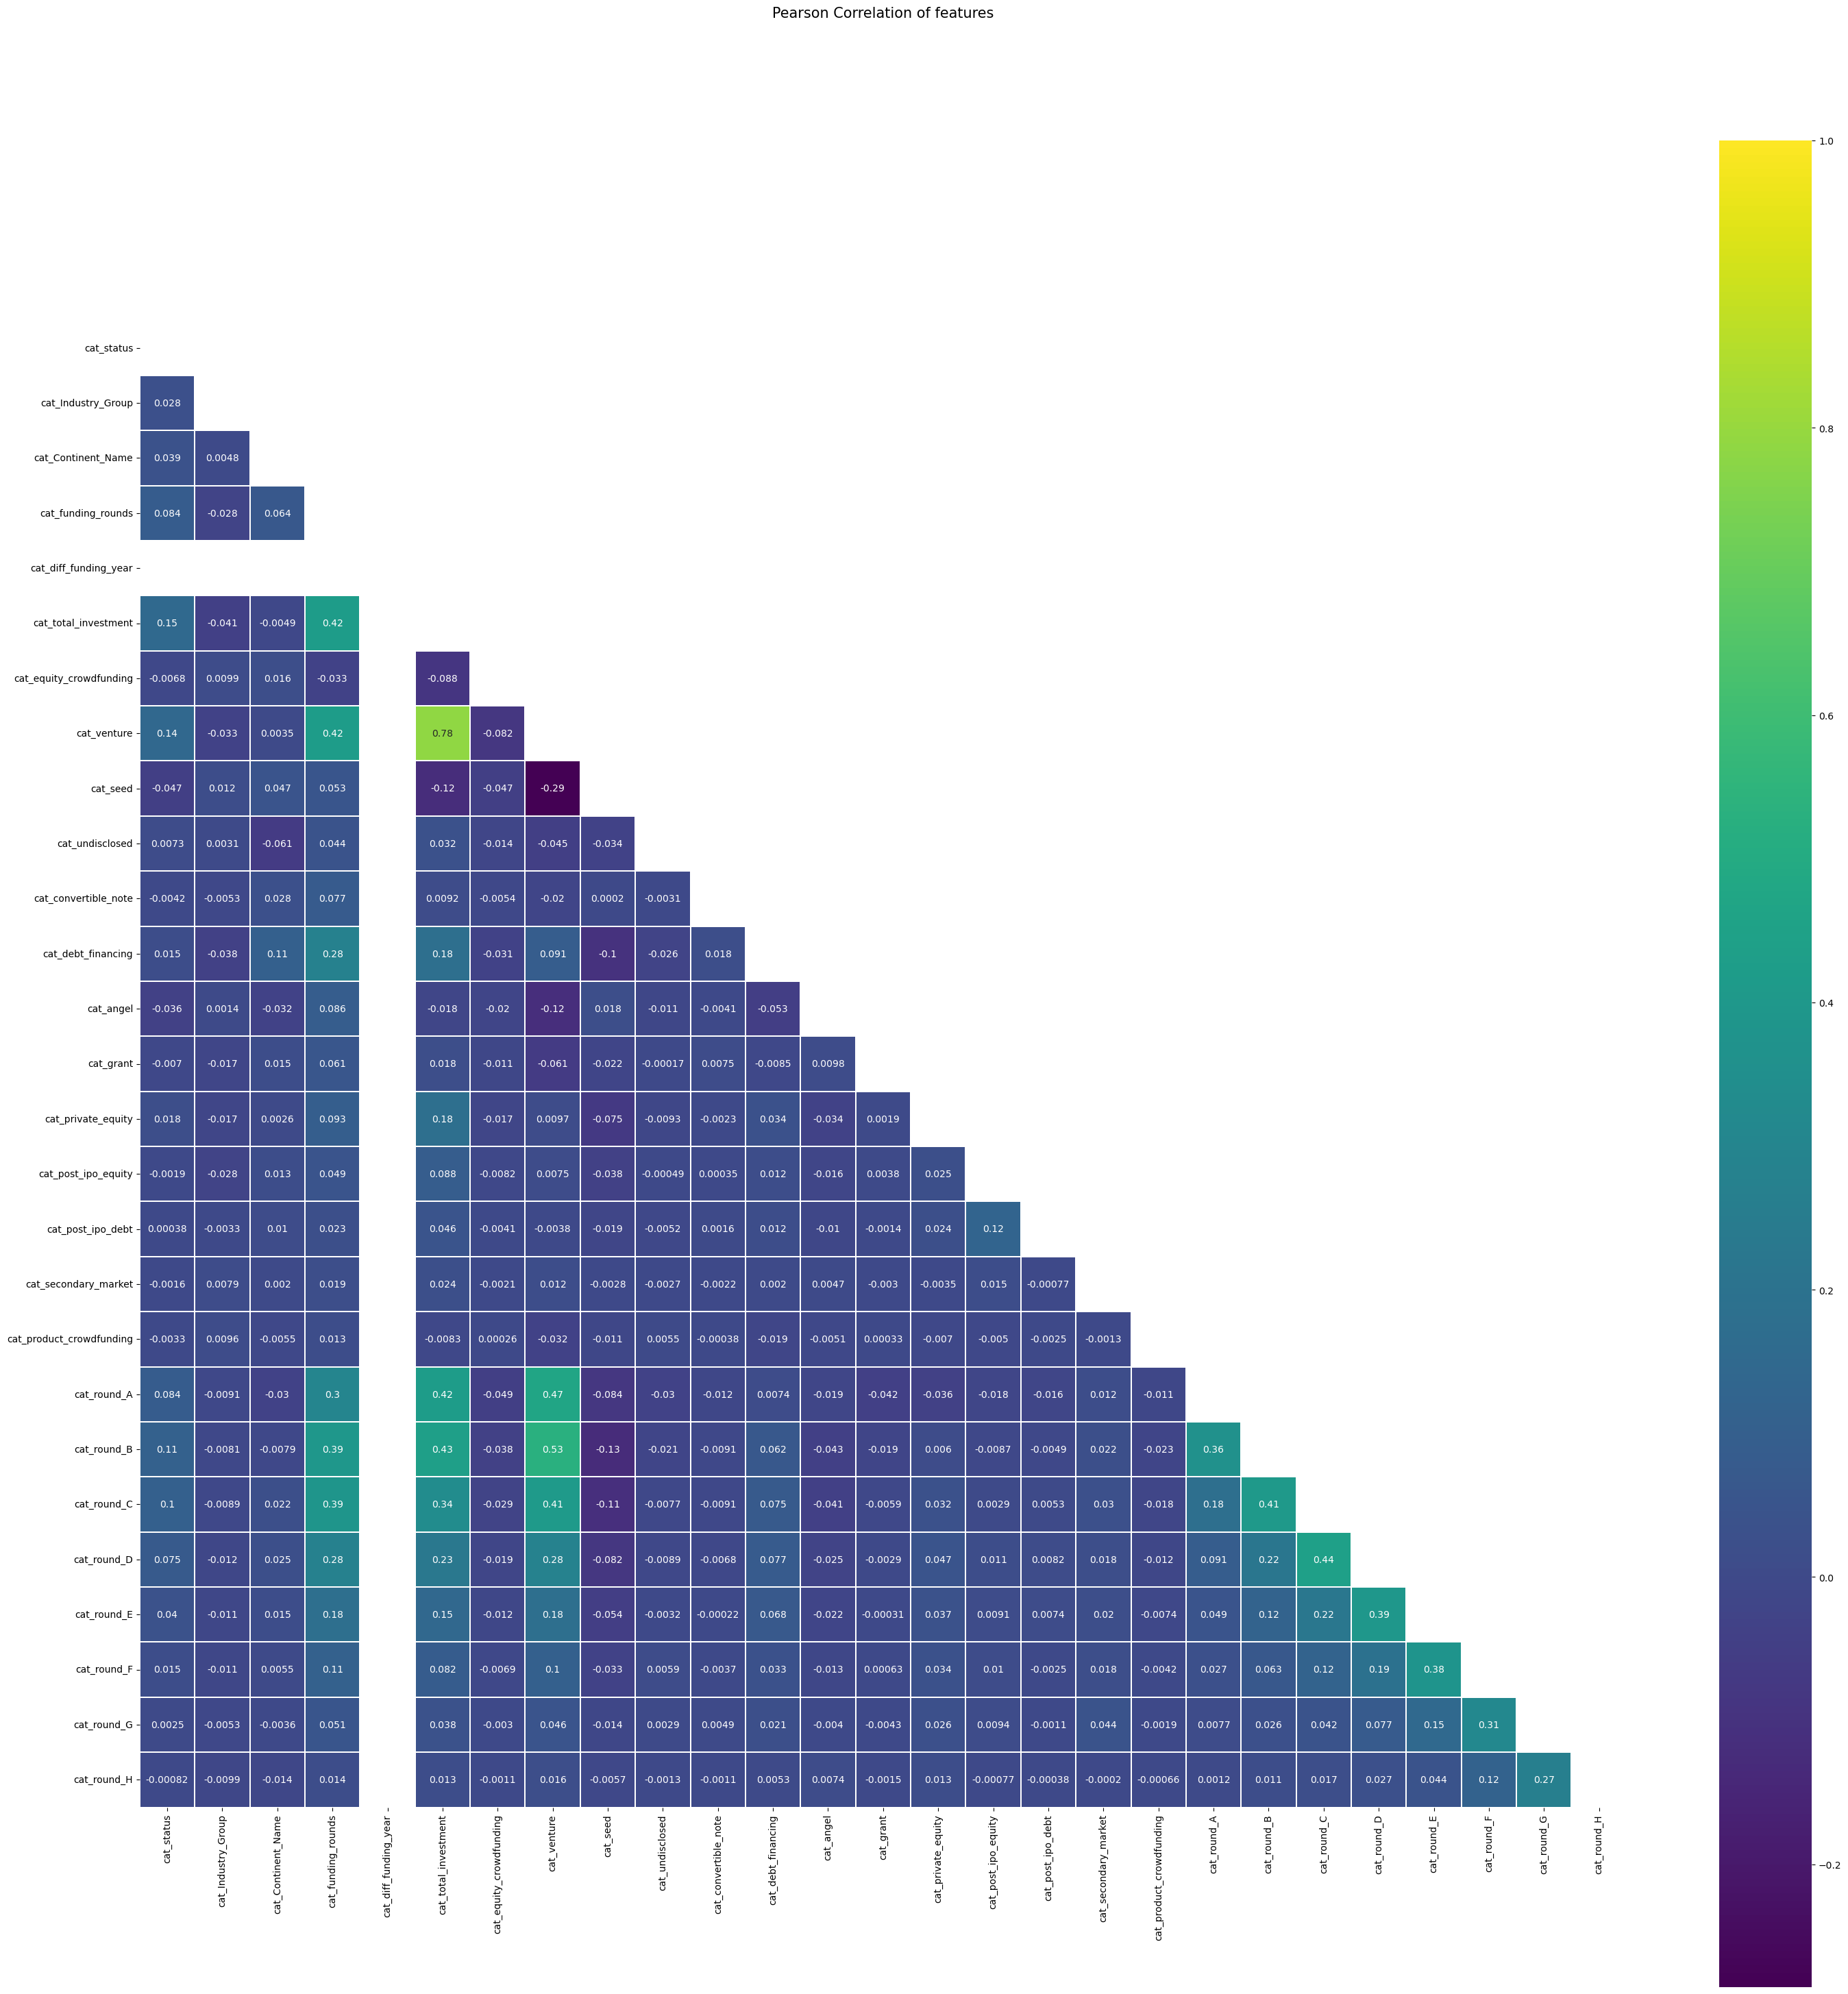

In [92]:
#creating correlation matrix

colormap = plt.cm.viridis
plt.figure(figsize = (35, 35))
plt.title('Pearson Correlation of features', y = 1.2, size = 15)
matrix = np.triu(data3.corr())
#print(matrix)
sns.heatmap(data3.astype(float).corr(), linewidth = 0.1, vmax = 1.0, square =True, cmap=colormap, linecolor = 'white', annot=True, mask = matrix)

In [93]:
data3.shape

(40132, 27)

In [94]:
# selecting the columns we need
data4 = data3[['cat_status', 'cat_Industry_Group', 'cat_Continent_Name',
       'cat_funding_rounds', 'cat_diff_funding_year', 'cat_total_investment', 'cat_venture', 'cat_seed', 'cat_debt_financing', 'cat_angel',
       'cat_private_equity', 'cat_round_A',
       'cat_round_B', 'cat_round_C', 'cat_round_D', 'cat_round_E',
       'cat_round_F']]

data4.shape

(40132, 17)

In [95]:
# Making new datafram that removes the operating value
data5 = data3.copy()
data5.drop(data5.index[data5['cat_status'] == 1], inplace = True)
data5 = data5.replace({'cat_status':2},1)    #only 0 and 1, 0 means closed and 1 means acquired

<Axes: title={'center': 'Pearson Correlation of features'}>

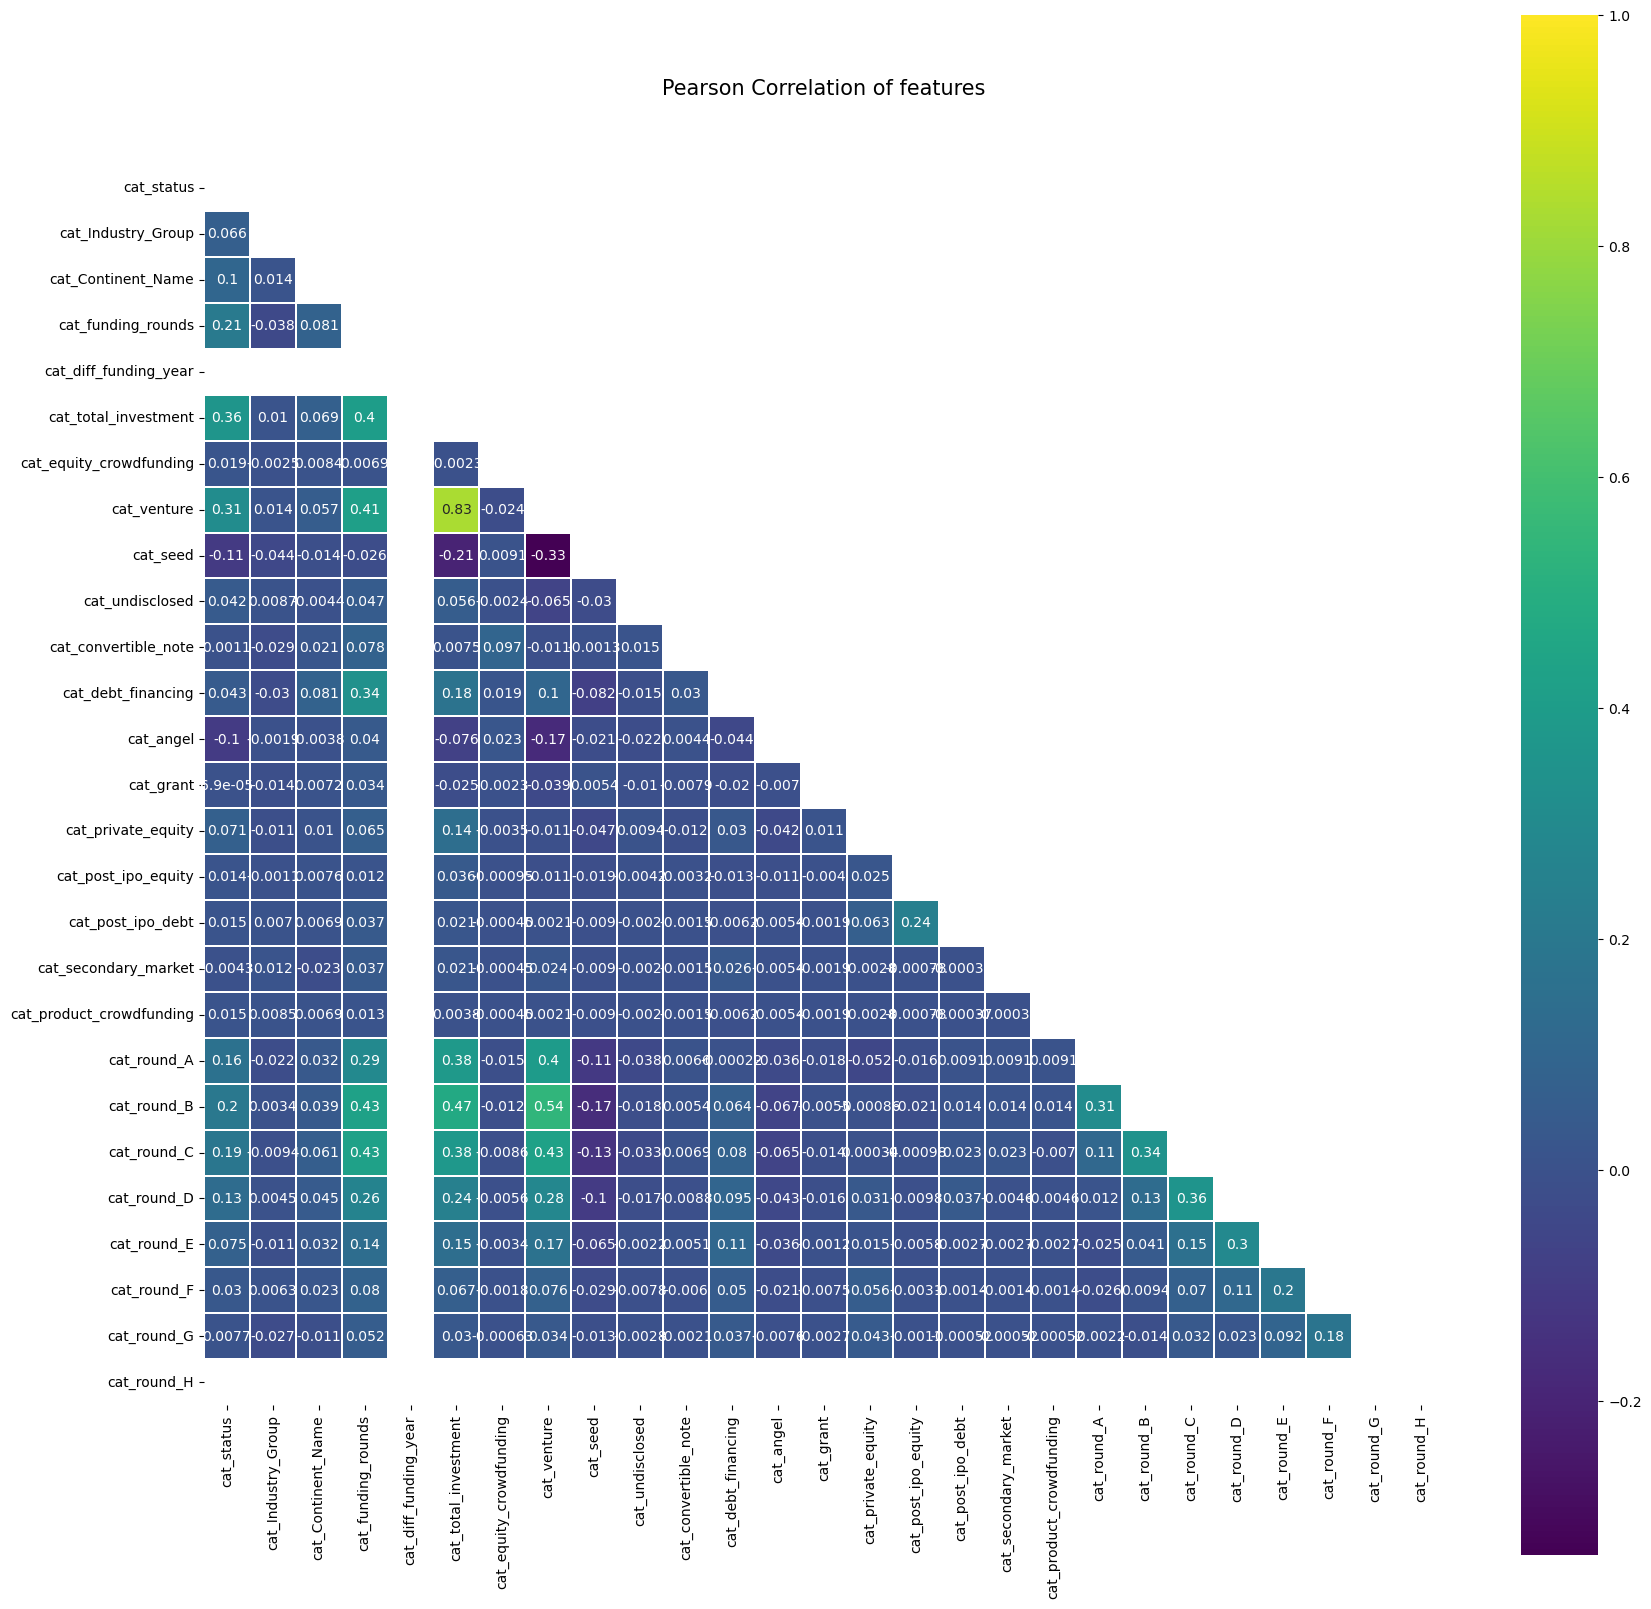

In [96]:
colormap = plt.cm.viridis
plt.figure(figsize = (20, 20))
plt.title('Pearson Correlation of features', y = 1.05, size = 15)
matrix = np.triu(data5.corr())
sns.heatmap(data5.astype(float).corr(), linewidth = 0.1, vmax = 1.0, square =True, cmap=colormap, linecolor = 'white', annot=True, mask = matrix)

#venture and investment is highly correlated. Also high correlation between the round and the round after it. 

In [97]:
data5 = data5[['cat_status', 'cat_Industry_Group', 'cat_Continent_Name',
       'cat_funding_rounds', 'cat_diff_funding_year', 'cat_total_investment', 'cat_venture', 'cat_seed', 'cat_debt_financing', 'cat_angel',
       'cat_private_equity', 'cat_round_A',
       'cat_round_B', 'cat_round_C', 'cat_round_D', 'cat_round_E',
       'cat_round_F']] 

# selecting the columns we need based on the correlation matrix

In [98]:
data5['cat_status'].count()  #number of companies

5475

In [99]:
data5.shape

(5475, 17)

## Model : Decision Tree 

#### Decision Tree: Multi Class Classification

In [102]:
#dataset splite into input and output
X = data4.drop("cat_status", axis = 1) 
Y = data4["cat_status"] 

# data splite into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [103]:
#checking size of each dataset
print('Shape of X_train: ',X_train.shape)
print('Shape of X_test: ',X_test.shape)
print('Shape of Y_train: ',Y_train.shape)
print('Shape of Y_test: ',Y_test.shape)

Shape of X_train:  (32105, 16)
Shape of X_test:  (8027, 16)
Shape of Y_train:  (32105,)
Shape of Y_test:  (8027,)


In [104]:
# model development
dt_clsssfier = DecisionTreeClassifier(random_state = 100) 
#fit the train data 
dt_model = dt_clsssfier.fit(X_train, Y_train)
#model predict on test data
preds = dt_model.predict(X_test) 
# model evaluation
print("Test Data",accuracy_score(Y_test,preds))
print("Train Data", accuracy_score(Y_train,dt_model.predict(X_train)))

print('\nClassification Report\n')
print(classification_report(Y_test, preds, target_names=['Closed', 'Operating', 'Acquired']))


Test Data 0.8400398654540925
Train Data 0.8821055910294346

Classification Report

              precision    recall  f1-score   support

      Closed       0.04      0.01      0.02       424
   Operating       0.86      0.97      0.91      6920
    Acquired       0.21      0.05      0.08       683

    accuracy                           0.84      8027
   macro avg       0.37      0.34      0.34      8027
weighted avg       0.77      0.84      0.80      8027



**accuracy score is high for training dataset which shows that it might be overfitting**

In [106]:
# #Hyper parameter tuning

# param_dict = {
#     "criterion":['gini', 'entropy'],
#     "max_depth": range(1,20),
#     "min_samples_split": range(1,20),
#     "min_samples_leaf": range(1,10)
# }

# decision_tree = DecisionTreeClassifier()

# grid = GridSearchCV(decision_tree,
#                     param_grid = param_dict,
#                     cv = 10, # cross validation method
#                     verbose = 1,
#                     n_jobs = -1) # set to use all processors

# #fitting model data
# model = grid.fit(X_train, Y_train)
# #model predict on test data
# preds = model.predict(X_test) 
# # model evaluation
# print("Test Data",accuracy_score(Y_test,preds))
# print("Train Data", accuracy_score(Y_train, model.predict(X_train)))

# print('\nClassification Report\n')
# print(classification_report(Y_test, preds, target_names=['Closed', 'Operating', 'Acquired']))


In [107]:
# finding the best grid parameter
#grid.best_params_ 

In [108]:
#using paramerters from the grid search to create the model

clf_model= DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 1, min_samples_split=2, random_state=40)

#fitting into the model
clf_model.fit(X_train,Y_train) 
y_train_pred=clf_model.predict(X_train)
y_test_pred=clf_model.predict(X_test)


#accuracy score of test and train data.
print("Test and Train Data Accuracy", accuracy_score(Y_train,y_train_pred),accuracy_score(Y_test,y_test_pred)) 
# classification report
print('\nClassification Report\n')
print(classification_report(Y_test, y_test_pred, target_names=['Closed', 'Operating', 'Acquired'])) 

Test and Train Data Accuracy 0.8639464257903753 0.8620904447489722

Classification Report

              precision    recall  f1-score   support

      Closed       0.00      0.00      0.00       424
   Operating       0.86      1.00      0.93      6920
    Acquired       0.00      0.00      0.00       683

    accuracy                           0.86      8027
   macro avg       0.29      0.33      0.31      8027
weighted avg       0.74      0.86      0.80      8027



C:\Users\Mrityunjay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrityunjay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrityunjay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [109]:
feature_cols = data4.columns
feature_importance = clf_model.tree_.compute_feature_importances(normalize=False)
feature_impt_dict = dict(zip(feature_cols, clf_model.feature_importances_))
feature_impt = pd.DataFrame.from_dict(feature_impt_dict, orient="index")
feature_impt.rename(columns = {0:"FeatureImportance"}, inplace = True)
feature_impt.sort_values(by=["FeatureImportance"], ascending=False).head(8)

,FeatureImportance
cat_diff_funding_year,0.461639
cat_Industry_Group,0.154577
cat_status,0.120520
cat_total_investment,0.101760
cat_private_equity,0.062342
cat_venture,0.036933
cat_debt_financing,0.029119
cat_Continent_Name,0.017621


In [110]:
#creating sample data frame to test the model and predict

sample_data = {'cat_Industry_Group': np.random.choice(range(0,42,1), size = (10)),
        'cat_Continent_Name': np.random.choice(range(0,5,1), size = (10)),
        'cat_funding_rounds': np.random.choice([0,1], size = (10)),
        'cat_diff_funding_year': np.random.choice([0,1], size = (10)),
        'cat_total_investment': np.random.choice([0,1,2,3], size = (10)),
        'cat_venture': np.random.choice([0,1,2,3], size = (10)),
        'cat_seed': np.random.choice([0,1], size = (10)),
        'cat_debt_financing': np.random.choice([0,1], size = (10)),
        'cat_angel': np.random.choice([0,1], size = (10)),
        'cat_private_equity': np.random.choice([0,1], size = (10)),
        'cat_round_A': np.random.choice([0,1], size = (10)),
        'cat_round_B': np.random.choice([0,1], size = (10)),
        'cat_round_C': np.random.choice([0,1], size = (10)),
        'cat_round_D': np.random.choice([0,1], size = (10)),
        'cat_round_E': np.random.choice([0,1], size = (10)),
        'cat_round_F': np.random.choice([0,1], size = (10))
       }
# sample dataset
sample_df= pd.DataFrame(sample_data, index=[0,1,2,3,4,5,6,7,8,9])
sample_df

,cat_Industry_Group,cat_Continent_Name,cat_funding_rounds,cat_diff_funding_year,cat_total_investment,cat_venture,cat_seed,cat_debt_financing,cat_angel,cat_private_equity,cat_round_A,cat_round_B,cat_round_C,cat_round_D,cat_round_E,cat_round_F
0,36,3,0,1,2,2,1,0,0,1,0,0,0,0,1,1
1,3,3,1,1,0,0,1,1,0,0,0,0,1,1,1,0
2,25,0,0,1,2,1,0,0,0,1,1,1,1,0,1,1
3,24,3,0,1,3,0,1,1,1,0,0,0,0,1,0,1
4,37,0,0,1,2,2,1,1,0,0,0,1,0,1,0,1
5,38,1,1,1,1,3,0,0,1,1,1,0,1,1,0,0
6,15,1,0,1,3,1,0,1,0,0,1,1,1,0,0,1
7,29,0,1,1,2,1,0,0,1,0,0,0,1,0,0,0
8,21,4,1,0,2,3,0,1,1,0,1,1,1,1,1,1
9,31,0,0,0,3,3,1,0,0,0,1,0,1,0,1,0


In [111]:
y_new_pred = clf_model.predict(sample_df)
y_new_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

#### Decision Tree: Binomial Classification

In [113]:
#Split the data into input and output
X5 = data5.drop('cat_status', axis = 1) 
Y5 = data5["cat_status"] 

#Split the data into train and test
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(X5, Y5, test_size = 0.2, random_state = 42)

In [114]:
#model 
clf_model5 = DecisionTreeClassifier(criterion = "gini", random_state = 20,
                               max_depth=3, min_samples_leaf=5)
# fitting the model
clf_model5.fit(X_train5, Y_train5) 

#predict the model
preds_model5 = clf_model5.predict(X_test5)
preds_model_train5 = clf_model5.predict(X_train5)

#Model Evaluation
print("Test Data", accuracy_score(Y_test5, preds_model5)) 

print("Train Data", accuracy_score(Y_train5, preds_model_train5))

# Classification report
print('\nClassification Report\n')
print(classification_report(Y_test5, preds_model5, target_names=['Class 0', 'Class 1']))

Test Data 0.6995433789954338
Train Data 0.6952054794520548

Classification Report

              precision    recall  f1-score   support

     Class 0       0.64      0.60      0.62       441
     Class 1       0.74      0.77      0.75       654

    accuracy                           0.70      1095
   macro avg       0.69      0.68      0.68      1095
weighted avg       0.70      0.70      0.70      1095



**Accuracy score for train dataset is more than test so model might be overfitting**

In [116]:
# #hyper parameter tuning

# param_dict = {
#     "criterion":['gini', 'entropy'],
#     "max_depth": range(1,20),
#     "min_samples_split": range(1,20),
#     "min_samples_leaf": range(1,10)
# }

# decision_tree = DecisionTreeClassifier()
# grid = GridSearchCV(decision_tree,
#                     param_grid = param_dict,
#                     cv = 10, # cross validation method
#                     verbose = 1,
#                     n_jobs = -1) # set to use all processors


# #fitting the model
# grid.fit(X_train5, Y_train5)

# #predict the model
# preds_model5 = clf_model5.predict(X_test5)
# preds_model_train5 = clf_model5.predict(X_train5)

# #Model Evaluation
# print("Test Data", accuracy_score(Y_test5, preds_model5)) 

# print("Train Data", accuracy_score(Y_train5, preds_model_train5))

# # Classification report
# print('\nClassification Report\n')
# print(classification_report(Y_test5, preds_model5, target_names=['Class 0', 'Class 1']))

In [117]:
# finding the best grid parameter
#grid.best_params_ 

In [118]:
#using parameter from grid to run model
clf_model5 = DecisionTreeClassifier(criterion = "gini", random_state = 20,
                               max_depth=3, min_samples_leaf=1, min_samples_split=2) 

#fit the traning data
clf_model5.fit(X_train5, Y_train5)

#model prediction
preds_model5 = clf_model5.predict(X_test5)
preds_model_train5 = clf_model5.predict(X_train5)

#model evaluation
print("Test data", accuracy_score(Y_test5,preds_model5))
print("Train data", accuracy_score(Y_train5,preds_model_train5))

#classification report
print('\nClassification Report\n')
print(classification_report(Y_test5, preds_model5, target_names=['Class 0', 'Class 1']))

Test data 0.6995433789954338
Train data 0.6952054794520548

Classification Report

              precision    recall  f1-score   support

     Class 0       0.64      0.60      0.62       441
     Class 1       0.74      0.77      0.75       654

    accuracy                           0.70      1095
   macro avg       0.69      0.68      0.68      1095
weighted avg       0.70      0.70      0.70      1095



In [119]:
#visulize the tree

In [120]:
#Calculating feature importance
feature_cols5 = data5.columns
feature_importance5 = clf_model5.tree_.compute_feature_importances(normalize=False)
feature_imp_dict5 = dict(zip(feature_cols5, clf_model5.feature_importances_))
feature_imp5 = pd.DataFrame.from_dict(feature_imp_dict5, orient='index')
feature_imp5.rename(columns = {0:'FeatureImportance'}, inplace = True)
feature_imp5.sort_values(by=['FeatureImportance'], ascending=False).head(6)

,FeatureImportance
cat_diff_funding_year,0.893330
cat_Industry_Group,0.033369
cat_status,0.025977
cat_round_B,0.020021
cat_debt_financing,0.016552
cat_Continent_Name,0.010751


In [121]:
#creating sample data frame to test the model and predict

sample_data = {'cat_Industry_Group': np.random.choice(range(0,42,1), size = (15)),
        'cat_Continent_Name': np.random.choice(range(0,5,1), size = (15)),
        'cat_funding_rounds': np.random.choice([0,1], size = (15)),
        'cat_diff_funding_year': np.random.choice([0,1], size = (15)),
        'cat_total_investment': np.random.choice([0,1,2,3], size = (15)),
        'cat_venture': np.random.choice([0,1,2,3], size = (15)),
        'cat_seed': np.random.choice([0,1], size = (15)),
        'cat_debt_financing': np.random.choice([0,1], size = (15)),
        'cat_angel': np.random.choice([0,1], size = (15)),
        'cat_private_equity': np.random.choice([0,1], size = (15)),
        'cat_round_A': np.random.choice([0,1], size = (15)),
        'cat_round_B': np.random.choice([0,1], size = (15)),
        'cat_round_C': np.random.choice([0,1], size = (15)),
        'cat_round_D': np.random.choice([0,1], size = (15)),
        'cat_round_E': np.random.choice([0,1], size = (15)),
        'cat_round_F': np.random.choice([0,1], size = (15))
       }

sample_df = pd.DataFrame(sample_data, index=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
sample_df.head(4)

,cat_Industry_Group,cat_Continent_Name,cat_funding_rounds,cat_diff_funding_year,cat_total_investment,cat_venture,cat_seed,cat_debt_financing,cat_angel,cat_private_equity,cat_round_A,cat_round_B,cat_round_C,cat_round_D,cat_round_E,cat_round_F
0,13,0,1,1,0,2,1,0,0,1,1,1,1,0,1,1
1,5,2,0,0,2,2,1,1,1,0,1,1,0,0,0,1
2,41,1,1,1,0,2,0,0,0,1,0,1,1,1,0,1
3,32,4,0,0,1,2,1,0,0,0,0,0,0,0,1,1


In [122]:
 # predicting using decision tree binomial model
ynew = clf_model5.predict(sample_df)
ynew

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

## Model: Random Forest

#### Random Forest: Multi Class Cassification

In [125]:
#split the data into input and output
X = data4.drop('cat_status', axis = 1) 
Y = data4["cat_status"]

#split the data into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [126]:
rfc_model = RandomForestClassifier(n_estimators = 1000, random_state = 42)

#training the model
rfc_model.fit(X_train, Y_train)

#model prediction
rfc_pred_test = rfc_model.predict(X_test)

#classification report
print(classification_report(Y_test, rfc_pred_test, target_names=['Class 1', 'Class 2', 'Class 3'])) 

              precision    recall  f1-score   support

     Class 1       0.03      0.00      0.00       424
     Class 2       0.86      0.98      0.92      6920
     Class 3       0.26      0.05      0.09       683

    accuracy                           0.85      8027
   macro avg       0.38      0.34      0.34      8027
weighted avg       0.77      0.85      0.80      8027



**Model is overfitting for class2 and bad at fitting 1 and 3**

In [128]:
#get numerical feature importance
importances = list(rfc_model.feature_importances_)
feature_list = list(X.columns)

#list of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

#shorting the features based on importance
feature_importances = sorted(feature_importances, key = lambda x:x[1], reverse = True)

#print the feature and importances
[print("Variable: {:20} Importance: {}".format(*pair)) for pair in feature_importances]

Variable: cat_Industry_Group   Importance: 0.55
Variable: cat_Continent_Name   Importance: 0.09
Variable: cat_total_investment Importance: 0.06
Variable: cat_funding_rounds   Importance: 0.04
Variable: cat_venture          Importance: 0.04
Variable: cat_seed             Importance: 0.03
Variable: cat_debt_financing   Importance: 0.03
Variable: cat_round_A          Importance: 0.03
Variable: cat_round_B          Importance: 0.03
Variable: cat_angel            Importance: 0.02
Variable: cat_round_C          Importance: 0.02
Variable: cat_round_D          Importance: 0.02
Variable: cat_round_E          Importance: 0.02
Variable: cat_private_equity   Importance: 0.01
Variable: cat_round_F          Importance: 0.01
Variable: cat_diff_funding_year Importance: 0.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [129]:
# #Using Random Grid
# # Number of trees in random forest

# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']

# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)

# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]

# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]

# # Method of selecting samples for training each tree
# bootstrap = [True, False]

# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)


In [130]:
# # Use the random grid to search for best hyperparameters

# # First create the base model 
# rf = RandomForestClassifier()

# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# # Fit the random search model
# rf_random.fit(X_train, Y_train)


In [131]:
#rf_random.best_params_ # finding best parameter

In [132]:
rfc_model = RandomForestClassifier(n_estimators = 1600, min_samples_split= 2, min_samples_leaf= 4,
                                   max_features= "sqrt", max_depth =10, bootstrap = True, random_state = 42)
rfc_model.fit(X_train, Y_train) 

rfc_pred_test = rfc_model.predict(X_test)
print(classification_report(Y_test, rfc_pred_test, target_names=['Class 1', 'Class 2', 'Class 3']))

              precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00       424
     Class 2       0.86      1.00      0.93      6920
     Class 3       0.00      0.00      0.00       683

    accuracy                           0.86      8027
   macro avg       0.29      0.33      0.31      8027
weighted avg       0.74      0.86      0.80      8027



C:\Users\Mrityunjay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrityunjay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrityunjay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [133]:
#creating sample data frame to test the model

sample_data = {'cat_Industry_Group': np.random.choice(range(0,42,1), size = (10)),
        'cat_Continent_Name': np.random.choice(range(0,5,1), size = (10)),
        'cat_funding_rounds': np.random.choice([0,1], size = (10)),
        'cat_diff_funding_year': np.random.choice([0,1], size = (10)),
        'cat_total_investment': np.random.choice([0,1,2,3], size = (10)),
        'cat_venture': np.random.choice([0,1,2,3], size = (10)),
        'cat_seed': np.random.choice([0,1], size = (10)),
        'cat_debt_financing': np.random.choice([0,1], size = (10)),
        'cat_angel': np.random.choice([0,1], size = (10)),
        'cat_private_equity': np.random.choice([0,1], size = (10)),
        'cat_round_A': np.random.choice([0,1], size = (10)),
        'cat_round_B': np.random.choice([0,1], size = (10)),
        'cat_round_C': np.random.choice([0,1], size = (10)),
        'cat_round_D': np.random.choice([0,1], size = (10)),
        'cat_round_E': np.random.choice([0,1], size = (10)),
        'cat_round_F': np.random.choice([0,1], size = (10))
       }
sample_df = pd.DataFrame(sample_data, index=[0,1,2,3,4,5,6,7,8,9])
sample_df.head(4)


,cat_Industry_Group,cat_Continent_Name,cat_funding_rounds,cat_diff_funding_year,cat_total_investment,cat_venture,cat_seed,cat_debt_financing,cat_angel,cat_private_equity,cat_round_A,cat_round_B,cat_round_C,cat_round_D,cat_round_E,cat_round_F
0,19,4,0,1,0,0,0,1,0,0,0,1,0,1,1,1
1,7,4,0,1,2,1,0,0,0,1,1,0,1,0,1,0
2,21,4,1,1,2,0,0,1,1,1,1,0,0,0,0,1
3,1,3,1,1,1,3,0,0,0,0,0,1,0,0,0,0


In [134]:
y_new_pred = rfc_model.predict(sample_df)
y_new_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

#### Random Forest: Binomial Classification

In [136]:
#data split in input and output
X5 = data5.drop('cat_status', axis = 1) 
Y5 = data5["cat_status"]

#split data into train and test
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(X5, Y5, test_size = 0.2, random_state = 42) 

In [137]:
rfc_model5 = RandomForestClassifier(n_estimators = 1000, random_state = 42)
#fit the data
rfc_model5.fit(X_train5, Y_train5) 
#predict the with using test data
rfc_pred_test5 = rfc_model5.predict(X_test5) 
#model evaluation# classification report
print(classification_report(Y_test5, rfc_pred_test5, target_names=['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.60      0.56      0.58       441
     Class 1       0.72      0.75      0.73       654

    accuracy                           0.67      1095
   macro avg       0.66      0.65      0.66      1095
weighted avg       0.67      0.67      0.67      1095



In [138]:
#get numerical feature importance
importances = list(rfc_model5.feature_importances_)
feature_list = list(X.columns)

#list of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

#shorting the features based on importance
feature_importances = sorted(feature_importances, key = lambda x:x[1], reverse = True)

#print the feature and importances
[print("Variable: {:20} Importance: {}".format(*pair)) for pair in feature_importances]

Variable: cat_Industry_Group   Importance: 0.42
Variable: cat_total_investment Importance: 0.17
Variable: cat_Continent_Name   Importance: 0.08
Variable: cat_venture          Importance: 0.08
Variable: cat_funding_rounds   Importance: 0.05
Variable: cat_round_B          Importance: 0.04
Variable: cat_seed             Importance: 0.03
Variable: cat_debt_financing   Importance: 0.03
Variable: cat_angel            Importance: 0.03
Variable: cat_round_A          Importance: 0.03
Variable: cat_round_C          Importance: 0.02
Variable: cat_private_equity   Importance: 0.01
Variable: cat_round_D          Importance: 0.01
Variable: cat_round_E          Importance: 0.01
Variable: cat_diff_funding_year Importance: 0.0
Variable: cat_round_F          Importance: 0.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [139]:
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']

# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)

# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]

# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]

# # Method of selecting samples for training each tree
# bootstrap = [True, False]

# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)


In [140]:
# # Use the random grid to search for best hyperparameters
# # First create the base model 
# rf = RandomForestClassifier()

# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# # Fit the random search model
# rf_random.fit(X_train5, Y_train5)


In [141]:
#rf_random.best_params_ # best parameters

In [142]:
#using the parameters from grid search to make the model
rfc_model5 = RandomForestClassifier(n_estimators = 200, min_samples_split= 5, min_samples_leaf= 4, max_features= "sqrt",
                                    max_depth =10, bootstrap = True, random_state = 42)
rfc_model5.fit(X_train5, Y_train5) 

rfc_pred_test5 = rfc_model5.predict(X_test5)
print(classification_report(Y_test5, rfc_pred_test5, target_names=['Class 0', 'Class 1']))


              precision    recall  f1-score   support

     Class 0       0.65      0.61      0.63       441
     Class 1       0.75      0.78      0.76       654

    accuracy                           0.71      1095
   macro avg       0.70      0.69      0.69      1095
weighted avg       0.71      0.71      0.71      1095



In [143]:
#creating sample data frame to test the model
sample_data = {'cat_Industry_Group': np.random.choice(range(0,42,1), size = (15)),
        'cat_Continent_Name': np.random.choice(range(0,5,1), size = (15)),
        'cat_funding_rounds': np.random.choice([0,1], size = (15)),
        'cat_diff_funding_year': np.random.choice([0,1], size = (15)),
        'cat_total_investment': np.random.choice([0,1,2,3], size = (15)),
        'cat_venture': np.random.choice([0,1,2,3], size = (15)),
        'cat_seed': np.random.choice([0,1], size = (15)),
        'cat_debt_financing': np.random.choice([0,1], size = (15)),
        'cat_angel': np.random.choice([0,1], size = (15)),
        'cat_private_equity': np.random.choice([0,1], size = (15)),
        'cat_round_A': np.random.choice([0,1], size = (15)),
        'cat_round_B': np.random.choice([0,1], size = (15)),
        'cat_round_C': np.random.choice([0,1], size = (15)),
        'cat_round_D': np.random.choice([0,1], size = (15)),
        'cat_round_E': np.random.choice([0,1], size = (15)),
        'cat_round_F': np.random.choice([0,1], size = (15))
       }

sample_df = pd.DataFrame(sample_data, index=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])

sample_df.head()

,cat_Industry_Group,cat_Continent_Name,cat_funding_rounds,cat_diff_funding_year,cat_total_investment,cat_venture,cat_seed,cat_debt_financing,cat_angel,cat_private_equity,cat_round_A,cat_round_B,cat_round_C,cat_round_D,cat_round_E,cat_round_F
0,19,2,0,1,3,1,0,1,1,0,0,0,0,0,1,0
1,17,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0
2,41,3,1,0,2,2,1,1,0,1,1,1,0,0,0,0
3,14,1,0,1,2,2,0,0,0,1,0,0,1,0,1,0
4,12,1,1,0,2,1,0,1,0,0,1,1,0,1,0,1


In [144]:
y_new_pred = clf_model5.predict(sample_df)
y_new_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64)